In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import LeaveOneOut, KFold


#from numpy import isnan
#from numpy import asarray
#from numpy import polyfit

from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
#from sklearn.datasets import make_classification

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Data Preprocessing

### Reading the data

In [2]:
df = pd.read_csv("spambase.data", header = None)

In [3]:
df

0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55    56  57  
0     0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1     0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2     0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3     0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4     0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  
...     ...  ...    ...    ...    ...    ...  ...   ...  ..  
4596  0.232  0.0  0.000  0.000  0.000  1.142    3    88   0  
4597  0.000  0.0  0.353  0.000  0.000  1.555    4    14   0  
4598  0.718  0.0  0.000  0.000  0.000  1.404    6   118   0  
4599  0.057  0.0  0.000  0.000  0.000  1.147    5    78   0  
4600  0.000  0.0  0.125  0.000  0.000  1.250    5    40   0  

[4601 rows x 58 columns]

In [4]:
df.shape

(4601, 58)

Dataset doesn't contain the names of features, so we need to assign the column labels

In [5]:
df.columns = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our',
    'word_freq_over',
    'word_freq_remove',
    'word_freq_internet',
    'word_freq_order',
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people',
    'word_freq_report',
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',
    'word_freq_you',
    'word_freq_credit',
    'word_freq_your',
    'word_freq_font',
    'word_freq_000',
    'word_freq_money',
    'word_freq_hp',
    'word_freq_hpl',
    'word_freq_george',
    'word_freq_650',
    'word_freq_lab',
    'word_freq_labs',
    'word_freq_telnet',
    'word_freq_857',
    'word_freq_data',
    'word_freq_415',
    'word_freq_85',
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',
    'word_freq_pm',
    'word_freq_direct',
    'word_freq_cs',
    'word_freq_meeting',
    'word_freq_original',
    'word_freq_project',
    'word_freq_re',
    'word_freq_edu',
    'word_freq_table',
    'word_freq_conference',
    'char_freq_;',
    'char_freq_(',
    'char_freq_[',
    'char_freq_!',
    'char_freq_$',
    'char_freq_#',
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
    'spam'
]

In [6]:
df.head(5)

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

In [7]:
df.tail(5)

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
4596            0.31                0.0           0.62           0.0   
4597            0.00                0.0           0.00           0.0   
4598            0.30                0.0           0.30           0.0   
4599            0.96                0.0           0.00           0.0   
4600            0.00                0.0           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
4596           0.00            0.31               0.0                 0.0   
4597           0.00            0.00               0.0                 0.0   
4598           0.00            0.00               0.0                 0.0   
4599           0.32            0.00               0.0                 0.0   
4600           0.00            0.00               0.0                 0.0   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
4596              0.0             0.0  ...        0.000        0.232   
4597              0.0             0.0  ...        0.000        0.000   
4598              0.0             0.0  ...        0.102        0.718   
4599              0.0             0.0  ...        0.000        0.057   
4600              0.0             0.0  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
4596          0.0        0.000          0.0          0.0   
4597          0.0        0.353          0.0          0.0   
4598          0.0        0.000          0.0          0.0   
4599          0.0        0.000          0.0          0.0   
4600          0.0        0.125          0.0          0.0   

      capital_run_length_average  capital_run_length_longest  \
4596                       1.142                           3   
4597                       1.555                           4   
4598                       1.404                           6   
4599                       1.147                           5   
4600                       1.250                           5   

      capital_run_length_total  spam  
4596                        88     0  
4597                        14     0  
4598                       118     0  
4599                        78     0  
4600                        40     0  

[5 rows x 58 columns]

Check if there are some nan values in the dataset

In [8]:
df.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

The dataset does not have missing values

Check if there are dublicates in data:

In [9]:
df[df.duplicated() == True]

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
26               0.0                0.0           0.00           0.0   
103              0.0                0.0           0.64           0.0   
104              0.0                0.0           0.00           0.0   
105              0.0                0.0           0.64           0.0   
106              0.0                0.0           0.00           0.0   
...              ...                ...            ...           ...   
4439             0.0                0.0           0.74           0.0   
4441             0.0                0.0           0.74           0.0   
4537             0.0                0.0           0.00           0.0   
4541             0.0                0.0           0.00           0.0   
4550             0.0                0.0           0.00           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
26              0.0            0.00               0.0                 0.0   
103             0.0            0.64               0.0                 0.0   
104             0.0            0.00               0.0                 0.0   
105             0.0            0.64               0.0                 0.0   
106             0.0            0.00               0.0                 0.0   
...             ...             ...               ...                 ...   
4439            0.0            0.00               0.0                 0.0   
4441            0.0            0.00               0.0                 0.0   
4537            0.0            0.00               0.0                 0.0   
4541            0.0            0.00               0.0                 0.0   
4550            0.0            0.00               0.0                 0.0   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
26                0.0             0.0  ...        0.000        0.196   
103               0.0             0.0  ...        0.094        0.189   
104               0.0             0.0  ...        0.305        0.611   
105               0.0             0.0  ...        0.094        0.189   
106               0.0             0.0  ...        0.305        0.611   
...               ...             ...  ...          ...          ...   
4439              0.0             0.0  ...        0.036        0.147   
4441              0.0             0.0  ...        0.036        0.147   
4537              0.0             0.0  ...        0.000        0.000   
4541              0.0             0.0  ...        0.000        0.000   
4550              0.0             0.0  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
26          0.000        0.392        0.196          0.0   
103         0.284        0.662        0.000          0.0   
104         0.000        1.529        0.000          0.0   
105         0.284        0.662        0.000          0.0   
106         0.000        1.529        0.000          0.0   
...           ...          ...          ...          ...   
4439        0.000        0.147        0.000          0.0   
4441        0.000        0.147        0.000          0.0   
4537        0.000        0.000        0.000          0.0   
4541        0.000        0.000        0.000          0.0   
4550        0.000        0.000        0.000          0.0   

      capital_run_length_average  capital_run_length_longest  \
26                         5.466                          22   
103                       10.068                         131   
104                        5.500                          22   
105                       10.068                         131   
106                        5.500                          22   
...                          ...                         ...   
4439                       2.587                          55   
4441                       2.587                          55   
4537                       1.000                      

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4596           0.00            0.31              0.00                0.00   
4597           0.00            0.00              0.00                0.00   
4598           0.00            0.00              0.00                0.00   
4599           0.32            0.00              0.00                0.00   
4600           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0                0.00            0.00  ...        0.000        0.000   
1                0.00            0.94  ...        0.000        0.132   
2                0.64            0.25  ...        0.010        0.143   
3                0.31            0.63  ...        0.000        0.137   
4                0.31            0.63  ...        0.000        0.135   
...               ...             ...  ...          ...          ...   
4596             0.00            0.00  ...        0.000        0.232   
4597             0.00            0.00  ...        0.000        0.000   
4598             0.00            0.00  ...        0.102        0.718   
4599             0.00            0.00  ...        0.000        0.057   
4600             0.00            0.00  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0             0.0        0.778        0.000        0.000   
1             0.0        0.372        0.180        0.048   
2             0.0        0.276        0.184        0.010   
3             0.0        0.137        0.000        0.000   
4             0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...   
4596          0.0        0.000        0.000        0.000   
4597          0.0        0.353        0.000        0.000   
4598          0.0        0.000        0.000        0.000   
4599          0.0        0.000        0.000        0.000   
4600          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4596                       1.142                           3   
4597                       1.555                           4   
4598                       1.404                      

In [12]:
df.shape

(4210, 58)

So we have reduced the amount of data in the dataset

Setting the spam value to 0 if the "word_freq_george" or the "word_freq_650" columns are greater than 0.0
Reason: In the documentation(spambase.DOCUMENTATION) it has clearly mentioned it

In [13]:
df.loc[(df['word_freq_george'] > 0) | (df['word_freq_650'] > 0), 'spam'] = 0

Let's have a look at the dataset and check if its updated or not

In [14]:
df_subset = df.loc[:, ['word_freq_george', 'word_freq_650', 'spam']]
df_subset

word_freq_george  word_freq_650  spam
0                  0.0            0.0     1
1                  0.0            0.0     1
2                  0.0            0.0     1
3                  0.0            0.0     1
4                  0.0            0.0     1
...                ...            ...   ...
4596               0.0            0.0     0
4597               0.0            0.0     0
4598               0.0            0.0     0
4599               0.0            0.0     0
4600               0.0            0.0     0

[4210 rows x 3 columns]

In conclusion, we can state that if the values in the "word_freq_george" or "word_freq_650" columns are greater than 0.0, then the corresponding values in the "spam" column have been updated to 0. This implies that the occurrence of the words "george" or "650" in an email are strong indicators that the email is not spam.

Save the modified dataframe to a new csv file

In [15]:
df.to_csv('modified_dataset.csv', index = False)

Creating a dataframe corresponding to the updated dataset

In [16]:
df_new = pd.read_csv('modified_dataset.csv', header=0)
df_new.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

In [17]:
df_new.shape

(4210, 58)

### Correlation

Calculate correlation matrix

In [18]:
tmp = df_new.corr()

In [19]:
tmp

word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000           0.034012       0.063207   
word_freq_address                 0.034012           1.000000       0.027789   
word_freq_all                     0.063207           0.027789       1.000000   
word_freq_3d                      0.005388          -0.008947      -0.019901   
word_freq_our                     0.021740           0.036975       0.065676   
word_freq_over                    0.055067           0.005526       0.066547   
word_freq_remove                  0.011061           0.077374       0.028581   
word_freq_internet               -0.004370           0.013706       0.007221   
word_freq_order                   0.103842           0.053426       0.077561   
word_freq_mail                    0.040829           0.184304       0.025138   
word_freq_receive                 0.063031           0.060724       0.055647   
word_freq_will                    0.075911           0.026247       0.065733   
word_freq_people                  0.061985           0.015538       0.036431   
word_freq_report                  0.032263           0.012414       0.004900   
word_freq_addresses               0.022454           0.061826       0.104574   
word_freq_free                    0.065443           0.046630       0.061937   
word_freq_business                0.081471           0.022018       0.029834   
word_freq_email                   0.051571           0.178853       0.110794   
word_freq_you                     0.120563           0.055876       0.126502   
word_freq_credit                  0.020924          -0.006735       0.030874   
word_freq_your                    0.121458           0.117797       0.147895   
word_freq_font                   -0.025574           0.001214      -0.039464   
word_freq_000                     0.126478           0.007064       0.106694   
word_freq_money                   0.205689           0.061282       0.031150   
word_freq_hp                     -0.075054          -0.053573      -0.092684   
word_freq_hpl                    -0.063467          -0.044627      -0.066464   
word_freq_george                 -0.048086          -0.011228      -0.081297   
word_freq_650                    -0.050054          -0.033000      -0.051471   
word_freq_lab                    -0.041541          -0.026048      -0.057847   
word_freq_labs                   -0.054241          -0.029419      -0.030519   
word_freq_telnet                 -0.038899          -0.015937      -0.036610   
word_freq_857                    -0.031634           0.028852      -0.063579   
word_freq_data                   -0.042715          -0.032575      -0.058002   
word_freq_415                    -0.026322           0.026039      -0.063417   
word_freq_85                     -0.046083          -0.025524      -0.048968   
word_freq_technology             -0.057296          -0.028262      -0.047593   
word_freq_1999                   -0.058771           0.003749      -0.074329   
word_freq_parts                  -0.008626          -0.012708       0.031756   
word_freq_pm                     -0.011199          -0.016208      -0.017418   
word_freq_direct                 -0.035467           0.002326      -0.046013   
word_freq_cs                     -0.005280          -0.019350      -0.030822   
word_freq_meeting                -0.026546          -0.035908      -0.007620   
word_freq_original               -0.025603           0.037681      -0.052736   
word_freq_project                -0.022980          -0.029055      -0.056883   
word_freq_re                     -0.037848           0.020029      -0.056600   
word_freq_edu                    -0.034455          -0.026004      -0.060558   
word_freq_table                  -0.000950          -0.012337       0.027384   
word_freq_conference             -0.018904          -0.020947      -0.029465   
char_freq_;                      -0.027248           0.014735      -0.036778   
char_freq_(                 

Plot correlation matrix

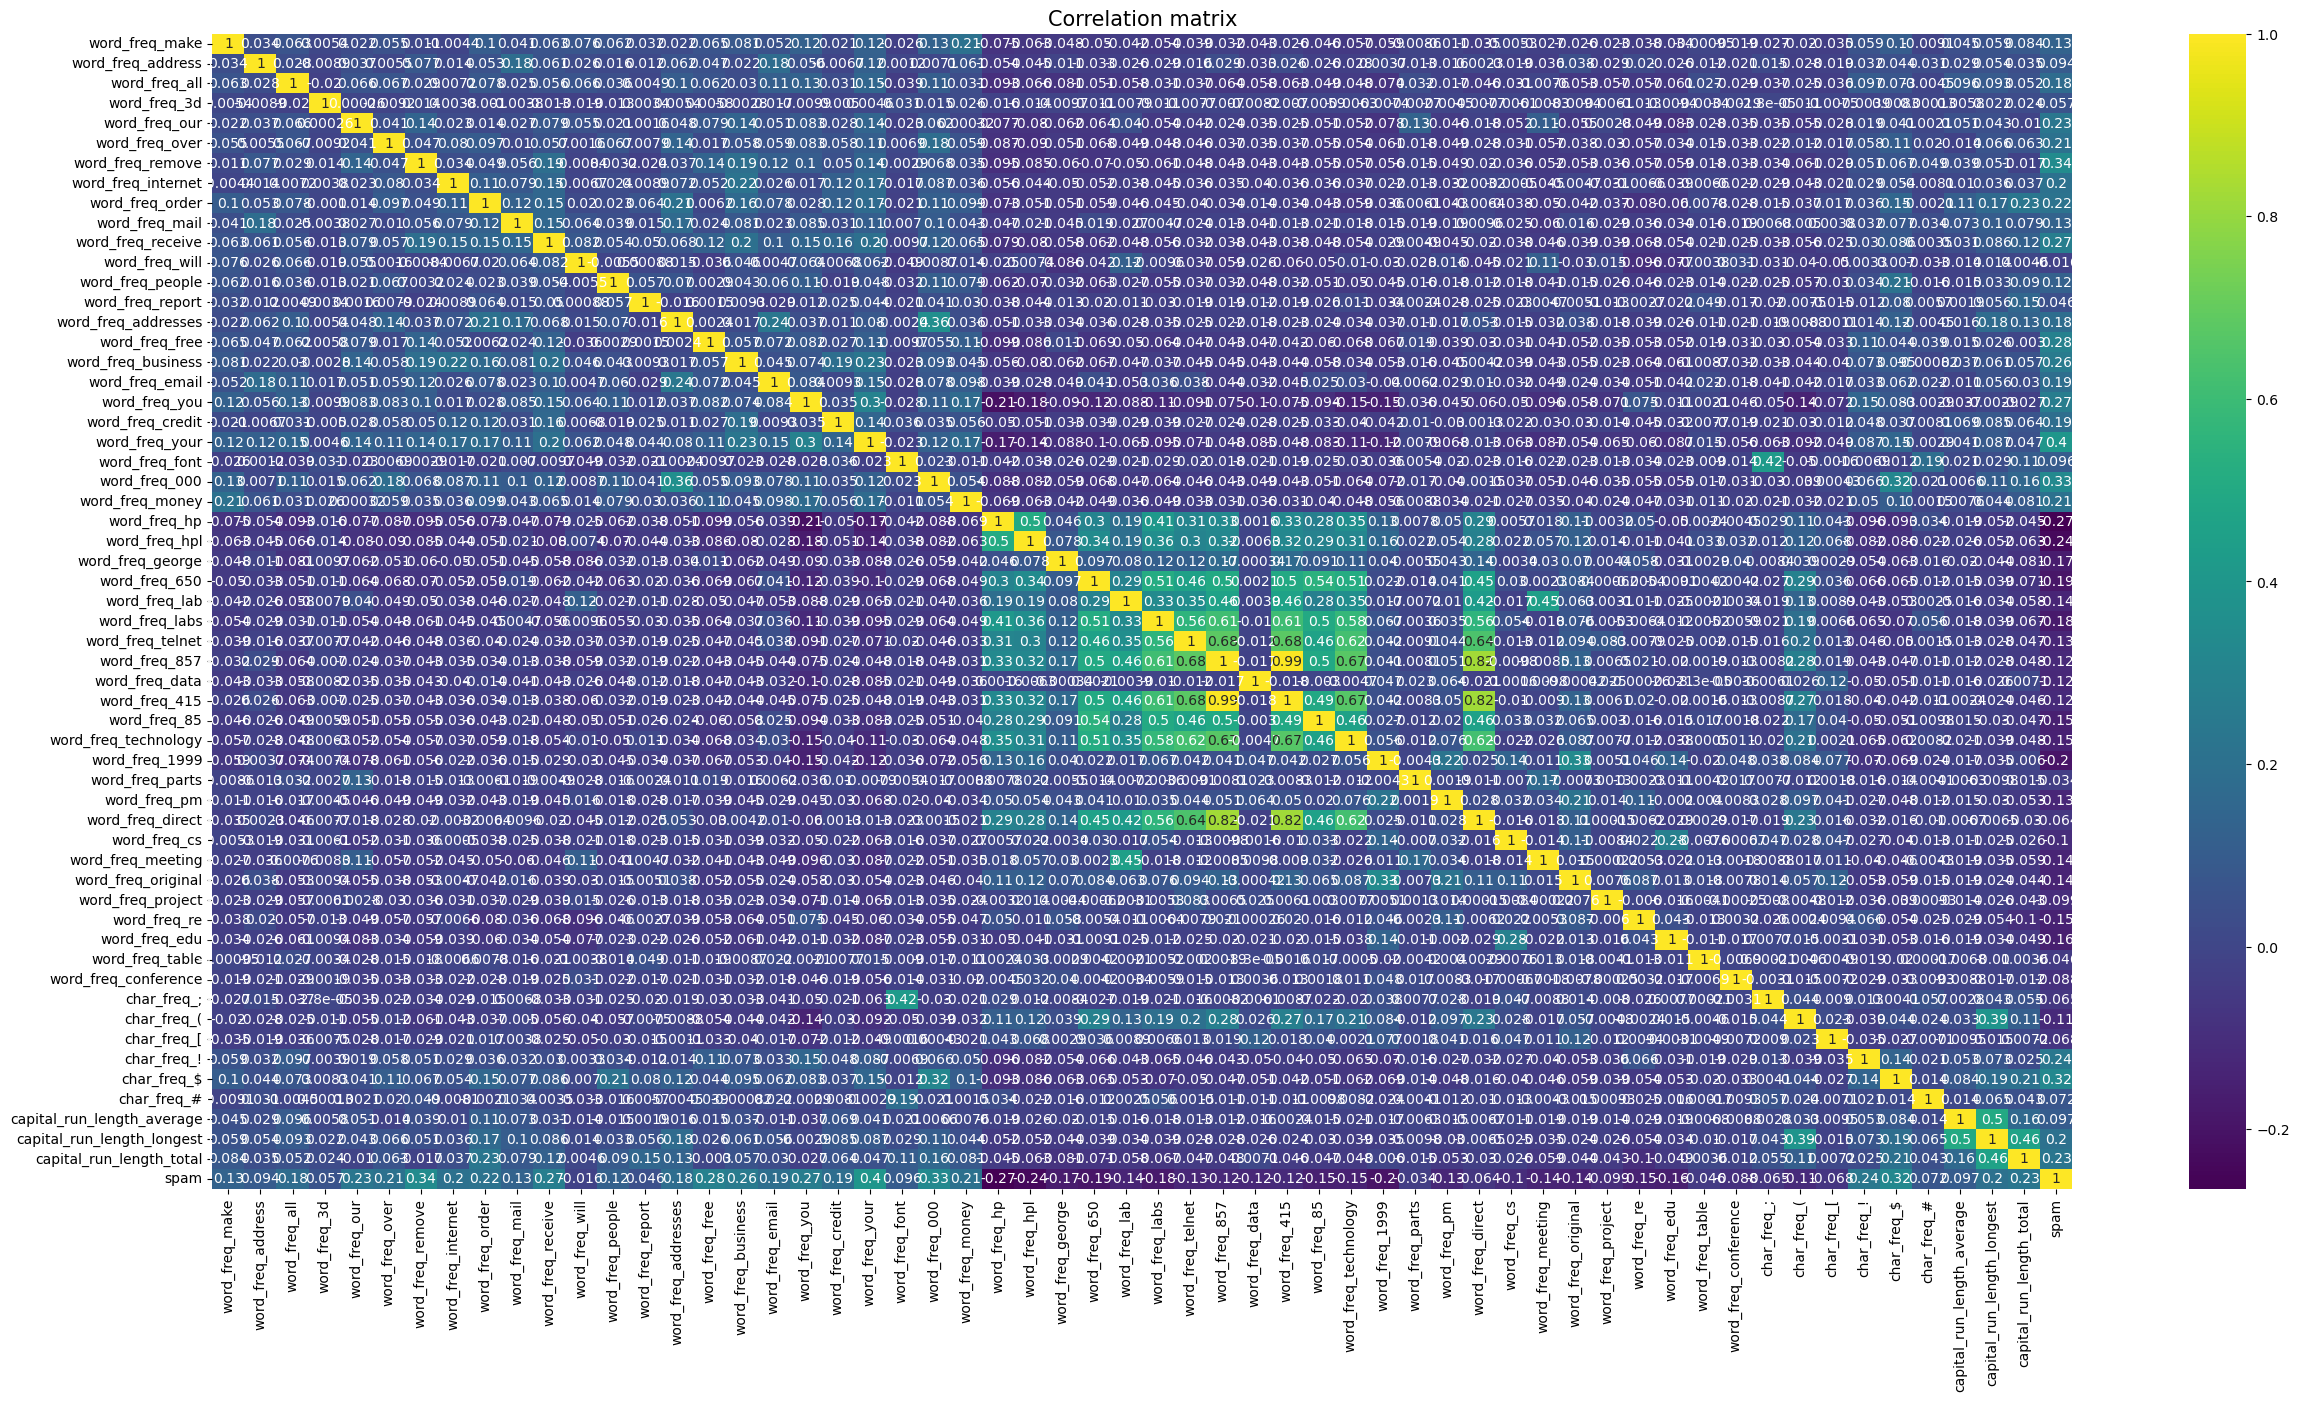

In [20]:
plt.figure(figsize = (30, 15))
sns.heatmap(tmp, annot = True, cmap = 'viridis')
plt.title("Correlation matrix", size = 15)
plt.show()

Drop very correlated features

In [21]:
mask = np.ones(tmp.shape, dtype = bool)
np.fill_diagonal(mask, 0)

index_i, index_j = np.where((abs(tmp) > 0.7) & mask)
print(index_i, index_j)  

[31 31 33 33 39 39] [33 39 31 39 31 33]


Chose columns with high correlation (> 0.7) between them

In [22]:
df_new.columns[31]

'word_freq_857'

In [23]:
df_new.columns[33]

'word_freq_415'

In [24]:
df_new.columns[39]

'word_freq_direct'

Values of the pairwise correlation between chosen columns

In [25]:
tmp['word_freq_857']['word_freq_415']

0.9948748363313183

In [26]:
tmp['word_freq_857']['word_freq_direct']

0.8242064307509771

In [27]:
tmp['word_freq_415']['word_freq_direct']

0.8208365438979347

Get rid of strongly correlated features features(corr > 0.7). save only column 'word_freq_direct'

In [28]:
df_no_strong_corr = df_new.drop(columns = ['word_freq_857', 'word_freq_415'])

In [29]:
df_no_strong_corr

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4205            0.31               0.00           0.62           0.0   
4206            0.00               0.00           0.00           0.0   
4207            0.30               0.00           0.30           0.0   
4208            0.96               0.00           0.00           0.0   
4209            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4205           0.00            0.31              0.00                0.00   
4206           0.00            0.00              0.00                0.00   
4207           0.00            0.00              0.00                0.00   
4208           0.32            0.00              0.00                0.00   
4209           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0                0.00            0.00  ...        0.000        0.000   
1                0.00            0.94  ...        0.000        0.132   
2                0.64            0.25  ...        0.010        0.143   
3                0.31            0.63  ...        0.000        0.137   
4                0.31            0.63  ...        0.000        0.135   
...               ...             ...  ...          ...          ...   
4205             0.00            0.00  ...        0.000        0.232   
4206             0.00            0.00  ...        0.000        0.000   
4207             0.00            0.00  ...        0.102        0.718   
4208             0.00            0.00  ...        0.000        0.057   
4209             0.00            0.00  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0             0.0        0.778        0.000        0.000   
1             0.0        0.372        0.180        0.048   
2             0.0        0.276        0.184        0.010   
3             0.0        0.137        0.000        0.000   
4             0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...   
4205          0.0        0.000        0.000        0.000   
4206          0.0        0.353        0.000        0.000   
4207          0.0        0.000        0.000        0.000   
4208          0.0        0.000        0.000        0.000   
4209          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4205                       1.142                           3   
4206                       1.555                           4   
4207                       1.404                      

We tried to reduce data 'dimension' (amount of columns) with help of correlation matrix analysis.
But we still have 56 columns. Then let's try to perform PCA in order to get the reasonable 'basis' of data.

### Principal Component Analysis

In [30]:
df_no_result = df_new.drop(columns=['spam'])
df_no_result

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4205            0.31               0.00           0.62           0.0   
4206            0.00               0.00           0.00           0.0   
4207            0.30               0.00           0.30           0.0   
4208            0.96               0.00           0.00           0.0   
4209            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4205           0.00            0.31              0.00                0.00   
4206           0.00            0.00              0.00                0.00   
4207           0.00            0.00              0.00                0.00   
4208           0.32            0.00              0.00                0.00   
4209           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0                0.00            0.00  ...                   0.0        0.000   
1                0.00            0.94  ...                   0.0        0.000   
2                0.64            0.25  ...                   0.0        0.010   
3                0.31            0.63  ...                   0.0        0.000   
4                0.31            0.63  ...                   0.0        0.000   
...               ...             ...  ...                   ...          ...   
4205             0.00            0.00  ...                   0.0        0.000   
4206             0.00            0.00  ...                   0.0        0.000   
4207             0.00            0.00  ...                   0.0        0.102   
4208             0.00            0.00  ...                   0.0        0.000   
4209             0.00            0.00  ...                   0.0        0.000   

      char_freq_(  char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0           0.000          0.0        0.778        0.000        0.000   
1           0.132          0.0        0.372        0.180        0.048   
2           0.143          0.0        0.276        0.184        0.010   
3           0.137          0.0        0.137        0.000        0.000   
4           0.135          0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...          ...   
4205        0.232          0.0        0.000        0.000        0.000   
4206        0.000          0.0        0.353        0.000        0.000   
4207        0.718          0.0        0.000        0.000        0.000   
4208        0.057          0.0        0.000        0.000        0.000   
4209        0.000          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537              

Create a scree plot

[9.25462065e-01 7.25629100e-02 1.91461432e-03 1.02875405e-05
 7.15869294e-06 5.96782175e-06 4.31590592e-06 3.07457811e-06
 2.73159675e-06 2.46163242e-06 2.11290981e-06 1.90636110e-06
 1.72724850e-06 1.64308037e-06 1.50736343e-06 1.34005518e-06
 1.16687103e-06 1.03369632e-06 1.01243813e-06 9.52763138e-07
 7.57641539e-07 7.25788657e-07 6.35887081e-07 5.75891847e-07
 5.33960598e-07 4.76671425e-07 4.57508621e-07 4.31542161e-07
 4.16740556e-07 4.10568496e-07 3.57953898e-07 3.38915601e-07
 3.20421376e-07 3.08329755e-07 3.00286908e-07 2.92316036e-07
 2.71169521e-07 2.19920684e-07 2.13145284e-07 2.06615265e-07
 1.89324337e-07 1.82948369e-07 1.68738111e-07 1.58640023e-07
 1.35989480e-07 1.28461400e-07 1.23951443e-07 1.16142036e-07
 1.13121533e-07 9.93898839e-08 9.57798795e-08 8.78333342e-08
 6.65111050e-08 5.09265681e-08 2.50704607e-08 1.46002097e-08
 1.07371893e-09]
1.0000000000000002


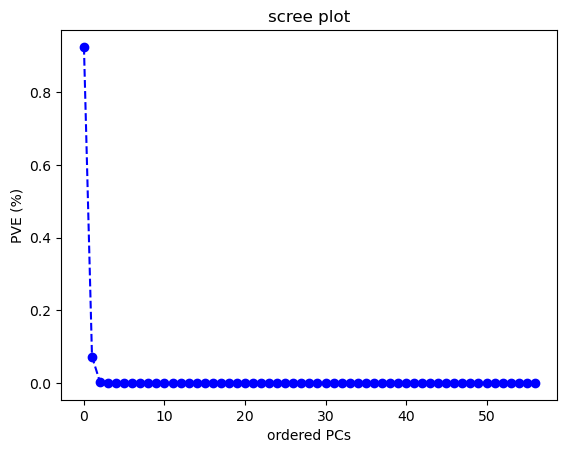

In [31]:
pca_model = PCA(n_components = 57)
pca_coordinates = pca_model.fit_transform(df_no_result)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:]))

By scree plot we can observe that it is enough to have 4 principal components.

[9.25462065e-01 7.25629100e-02 1.91461432e-03 1.02875405e-05]
0.9999498772078989


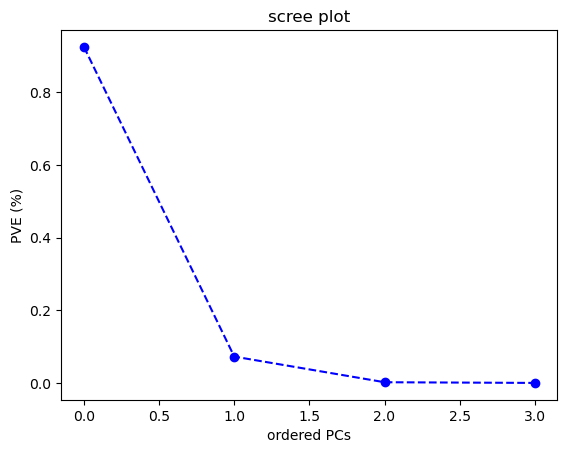

In [32]:
pca_model = PCA(n_components = 4)
pca_coordinates = pca_model.fit_transform(df_no_result)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:]))

Create a dataframe with obtained 4 components and 1 result column

In [33]:
df_pca = pd.DataFrame(pca_coordinates)
df_pca.rename({0:'Component1', 1:'Component2', 2:'Component3', 3:'Component4'}, axis=1, inplace=True)
df_pca['Result'] = df_new['spam']
df_pca

Component1  Component2  Component3  Component4  Result
0      -11.600978   10.680921   -2.502124   -0.809471       1
1      735.050164  -70.631211   -1.008541   -1.839826       1
2     2011.760589  108.977003  -25.300167    0.078985       1
3     -100.843543    4.030041   -1.237882   -1.394403       1
4     -100.843544    4.030039   -1.237879   -1.394301       1
...           ...         ...         ...         ...     ...
4205  -208.470738  -15.967542   -0.745520    0.291854       0
4206  -281.339988   -3.032358   -0.816279   -3.541927       0
4207  -178.377573  -17.824756   -0.611699   -0.338596       0
4208  -218.018609  -12.391679   -0.977085   -0.554278       0
4209  -255.521900   -6.264065   -1.075588   -2.334813       0

[4210 rows x 5 columns]

### Selecting best important features using SelectFromModel

In [34]:
X = df_no_result
y = df_new['spam']

sfm_selector = SelectFromModel(estimator = DecisionTreeClassifier())
sfm_selector.fit(X, y)

X.columns[sfm_selector.get_support()]

Index(['word_freq_our', 'word_freq_remove', 'word_freq_internet',
       'word_freq_free', 'word_freq_hp', 'word_freq_george', 'word_freq_edu',
       'char_freq_!', 'char_freq_$', 'capital_run_length_average',
       'capital_run_length_longest'],
      dtype='object')

Creating dataframe from chosen columns

In [35]:
df_SFM = df_new[['word_freq_remove', 'word_freq_internet', 'word_freq_free',
       'word_freq_hp', 'word_freq_george', 'word_freq_edu', 'char_freq_!',
       'char_freq_$', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'spam']]
df_SFM

word_freq_remove  word_freq_internet  word_freq_free  word_freq_hp  \
0                 0.00                0.00            0.32           0.0   
1                 0.21                0.07            0.14           0.0   
2                 0.19                0.12            0.06           0.0   
3                 0.31                0.63            0.31           0.0   
4                 0.31                0.63            0.31           0.0   
...                ...                 ...             ...           ...   
4205              0.00                0.00            0.00           0.0   
4206              0.00                0.00            0.00           0.0   
4207              0.00                0.00            0.00           0.0   
4208              0.00                0.00            0.00           0.0   
4209              0.00                0.00            0.00           0.0   

      word_freq_george  word_freq_edu  char_freq_!  char_freq_$  \
0                  0.0           0.00        0.778        0.000   
1                  0.0           0.00        0.372        0.180   
2                  0.0           0.06        0.276        0.184   
3                  0.0           0.00        0.137        0.000   
4                  0.0           0.00        0.135        0.000   
...                ...            ...          ...          ...   
4205               0.0           0.31        0.000        0.000   
4206               0.0           2.00        0.353        0.000   
4207               0.0           1.20        0.000        0.000   
4208               0.0           0.32        0.000        0.000   
4209               0.0           0.65        0.125        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4205                       1.142                           3   
4206                       1.555                           4   
4207                       1.404                           6   
4208                       1.147                           5   
4209                       1.250                           5   

      capital_run_length_total  spam  
0                          278     1  
1                         1028     1  
2                         2259     1  
3                          191     1  
4                          191     1  
...                        ...   ...  
4205                        88     0  
4206                        14     0  
4207                       118     0  
4208                        78     0  
4209                        40     0  

[4210 rows x 12 columns]

# Divide dataset into training and testing sets

Help function

In [42]:
scaler = StandardScaler()
np.random.seed(42)

def normalize_train_test(X, y, testsize, normalize):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize)
    if normalize == True:
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

We divide dataset for each of 4 ways of chosen data for further analysis

If we take all dataset for further analysis

In [43]:
X_for_corr = df_no_result
X_for_corr
y_for_corr = df_new['spam']
X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr = train_test_split(X_for_corr, y_for_corr, test_size=0.33)

If we take dataset without very correlated features for further analysis

In [44]:
X_no_strong_corr = df_no_strong_corr.drop('spam', axis = 1)
y_no_strong_corr = df_no_strong_corr['spam']
X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr = train_test_split(X_no_strong_corr, y_no_strong_corr, test_size=0.33)  

If we take principal components vectors for further analysis

In [45]:
X_pca = df_pca.drop('Result', axis = 1)
y_pca = df_pca['Result']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.33)

If we take features chosen by SelectFromModel for further analysis

In [46]:
X_SFM = df_SFM.drop('spam', axis = 1)
y_SFM = df_SFM['spam']
X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM = train_test_split(X_SFM, y_SFM, test_size=0.33)
 

# Decision Tree

Use the methods 𝙳𝚎𝚌𝚒𝚜𝚒𝚘𝚗𝚃𝚛𝚎𝚎𝙲𝚕𝚊𝚜𝚜𝚒𝚏𝚒𝚎𝚛() and 𝚙𝚕𝚘𝚝⎯𝚝𝚛𝚎𝚎() of 𝚜𝚌𝚒𝚔𝚒𝚝⎯𝚕𝚎𝚊𝚛𝚗 to train, test and depict a classification tree

### Include all features

(4210, 57)
(2820, 57)

training accuracy: 0.999290780141844
testing accuracy: 0.8935251798561151


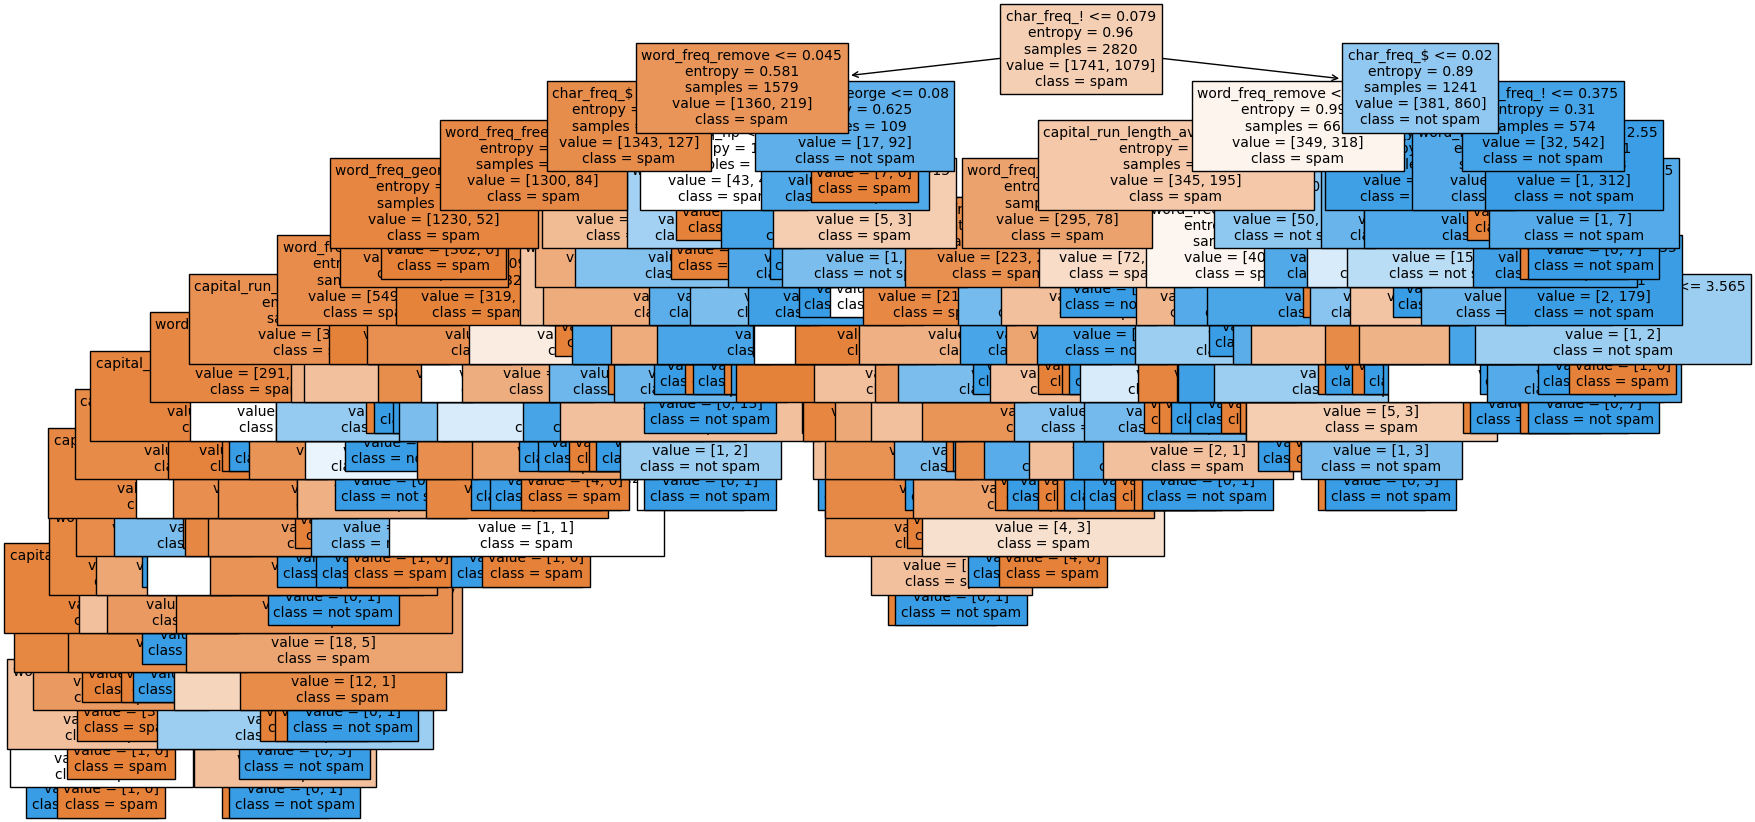


Depth is 20
Number of leafes: 169


In [41]:
data = df_no_result
target = df_new['spam']
feat_names = df_new.columns
targ_names = ['spam', 'not spam']
print(data.shape)


X_train, X_test, y_train, y_test = X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'\ntraining accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

print('\nDepth is',tree_model.tree_.max_depth + 1)
print('Number of leafes:', tree_model.tree_.n_leaves)

Apply the pruning by penalizing the tree complexity with the optional parameter cpp .........................

Train a classification tree with pruning with grid-search cross-validation on the complexity parameter (in order to avoid overfitting)

In [42]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00026769 0.00044153 0.00046101 0.00052934 0.0006379
 0.00070922 0.00070922 0.00070922 0.0008948  0.00097691 0.00097691
 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691
 0.00097691 0.00106383 0.00106383 0.00109305 0.00110749 0.00114333
 0.00115075 0.00115075 0.00115075 0.00115075 0.00115075 0.00115075
 0.00123648 0.00125792 0.00128001 0.00129485 0.00129503 0.00130792
 0.00132196 0.00132459 0.00138041 0.00139712 0.00141844 0.00146537
 0.00151923 0.0015287  0.00154203 0.00154203 0.0015542  0.00155687
 0.00155687 0.00157692 0.00158334 0.00161933 0.00164655 0.0016631
 0.00169535 0.00171007 0.00174587 0.00178914 0.00180361 0.001843
 0.001843   0.00187957 0.00190847 0.0019457  0.00195382 0.00196575
 0.00197226 0.00197336 0.00206813 0.0021425  0.00214672 0.00218421
 0.002191   0.0021987  0.00220195 0.00222536 0.00223684 0.002243
 0.00225891 0.00226756 0.00233832 0.00236005 0.00243895 0.00263947
 0.00273327 0.00273611 0.00290209 0.00313161 0.00332038 0.00332378
 

For each alpha we will append our model to a list

In [43]:
tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    

We will remove the last element in tree_models and ccp_alphas, because it is the trivial tree with only one node.

Plot the dependency between amount of nodes in tree, depth of tree and cpp_alpha, test accuracy of decision tree and cpp_alpha in order to choose proper parameter of pruning cpp_alpha

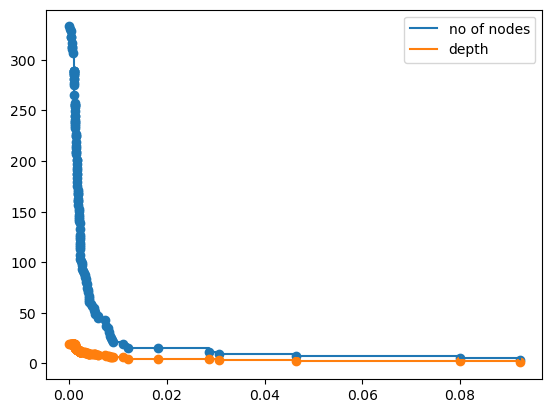

In [44]:
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases

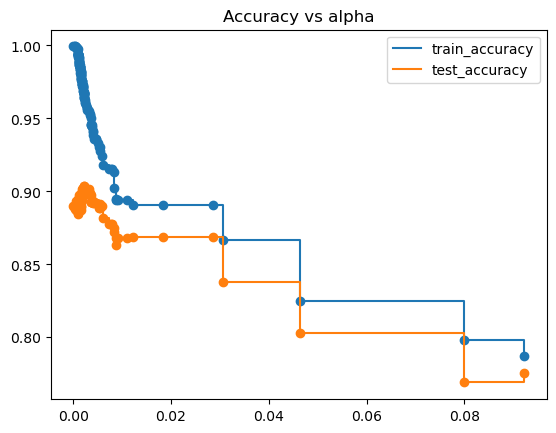

In [45]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.007

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [46]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.007)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

Obtain confusion matrix in order to define different accuracy measures

In [53]:
# helper functions

def plot_confusionmatrix(y_train_pred, y_train, dom):
    print(f'\n{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf, annot = True, yticklabels = targ_names,
                xticklabels = targ_names, cmap = 'Blues', fmt = 'g')
    plt.tight_layout()
    plt.show()

def accuracy_metrics(y_pred_test, y_test, dom):
    cf = confusion_matrix(y_pred_test, y_test)
    accuracy = (cf[0][0] + cf[1][1]) / (cf[0][0] + cf[0][1] + cf[1][0] + cf[1][1])

    true_positive = cf[0][0] / (cf[0][0] + cf[1][0])
    true_negative = cf[1][1] / (cf[0][1] + cf[1][1])

    balanced_accuracy = (true_positive + true_negative) / 2

    print(f'{dom} true positive: {true_positive}')
    print(f'{dom} true negative: {true_negative}\n')
    print(f'{dom} accuracy: {accuracy}')
    print(f'{dom} balanced accuracy: {balanced_accuracy}')

In [54]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

NameError: name 'y_train_pred' is not defined

In [55]:
plot_confusionmatrix(y_test_pred,y_test,dom = 'Test')
accuracy_metrics(y_test_pred, y_test, dom = 'Test')

NameError: name 'y_test_pred' is not defined

Obtained pruned decision tree (with not bad accuracy and with not very big amount of leaves and nodes in depth)

NameError: name 'tree_model_pruned' is not defined

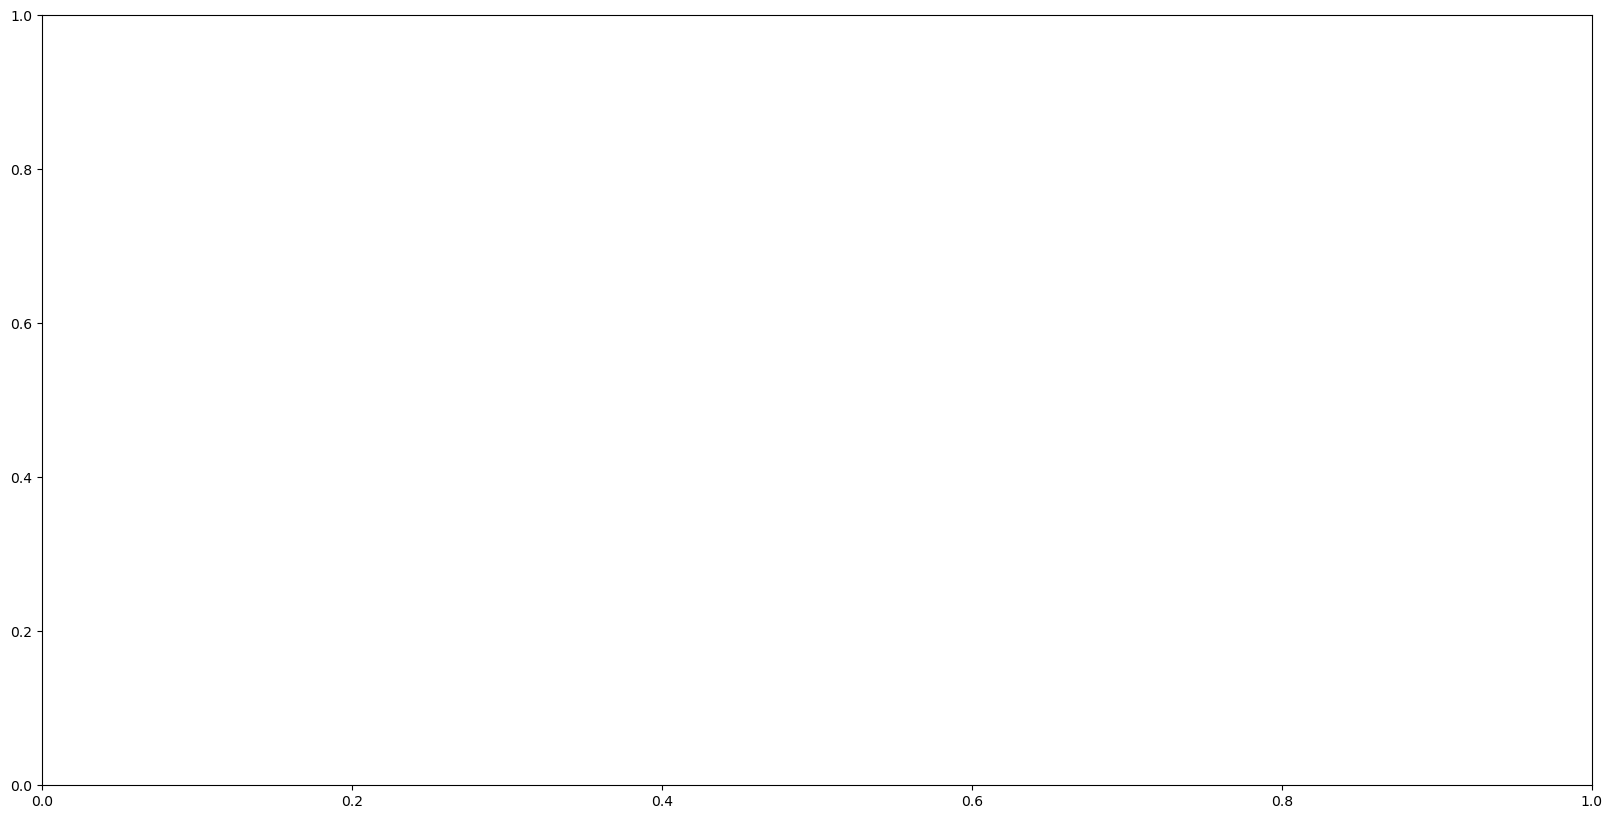

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

print('Depth is',tree_model_pruned.tree_.max_depth + 1)
print('Number of leafes ', tree_model_pruned.tree_.n_leaves)

### Without strongly correlated features

(4210, 55)
(2820, 55)

training accuracy: 0.999645390070922
testing accuracy: 0.9122302158273381

Depth is 25
Number of leafes: 167



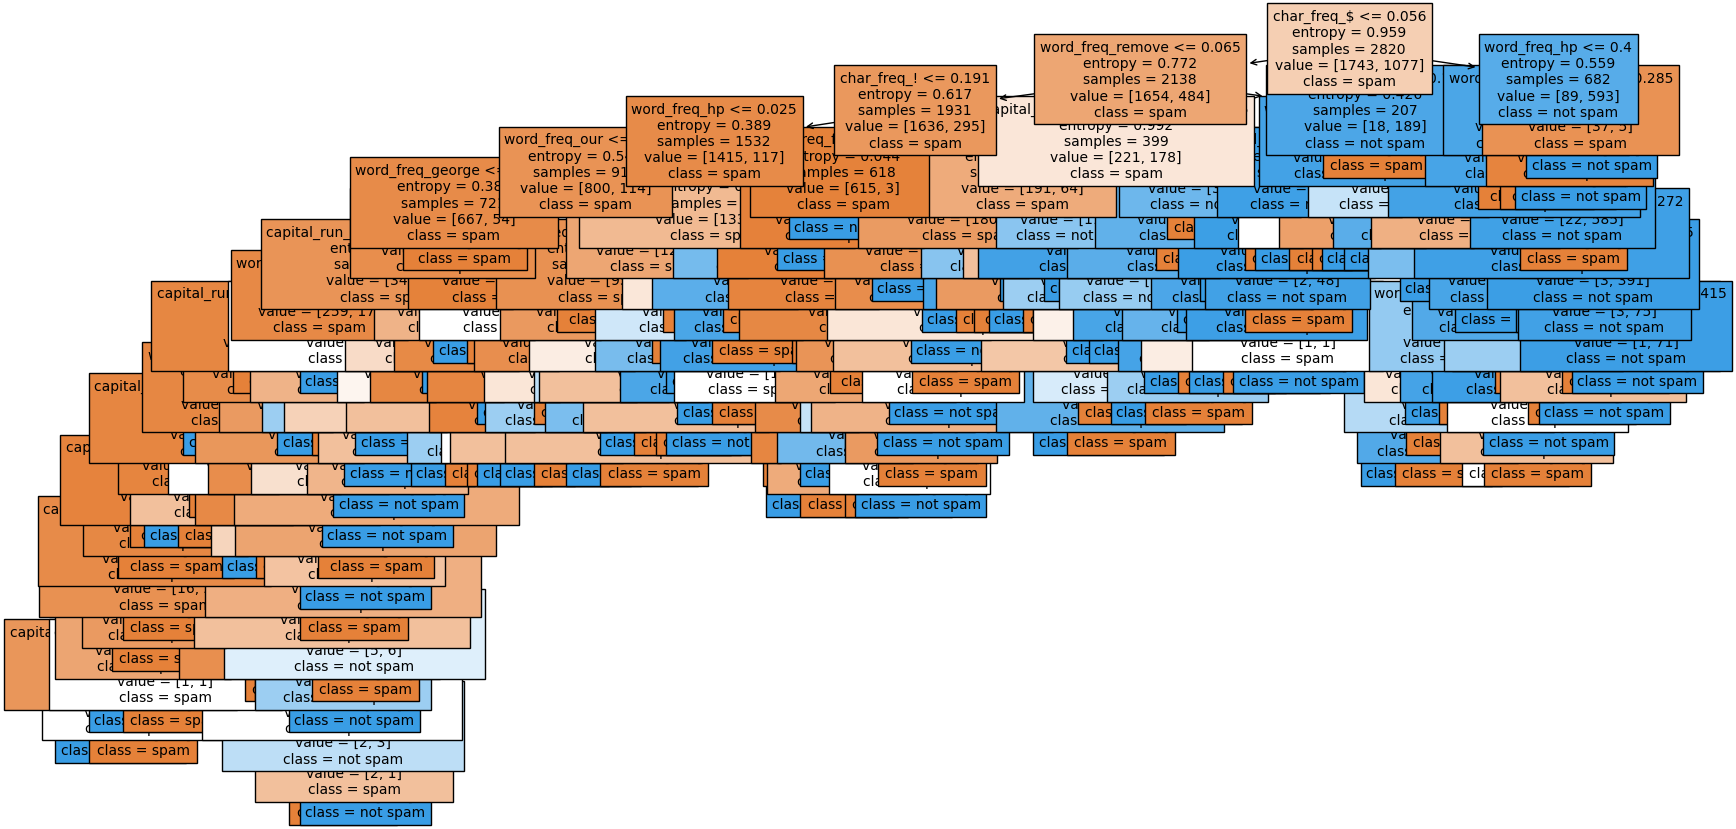

In [57]:
data = X_no_strong_corr
target = df_new['spam']
feat_names = X_no_strong_corr.columns
targ_names = ['spam', 'not spam']
print(data.shape)

X_train, X_test, y_train, y_test = X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'\ntraining accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

print('\nDepth is',tree_model.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Apply the cost complexity pruning in order to avoid overfitting and make model more generalized

In [58]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00026769 0.00044153 0.00044842 0.00069151 0.00070922
 0.00070922 0.00070922 0.00070922 0.00070922 0.00070922 0.00075947
 0.00080307 0.00094669 0.00097691 0.00097691 0.00097691 0.00097691
 0.00097691 0.00097691 0.00097691 0.0009857  0.00105922 0.00108422
 0.0011275  0.00115075 0.00115075 0.00116559 0.00120919 0.00121015
 0.00121948 0.00128001 0.00129019 0.00137103 0.00138303 0.0014036
 0.00141744 0.00141844 0.00143876 0.00144147 0.00144482 0.00147891
 0.00150066 0.00153008 0.00154343 0.00160614 0.00164126 0.0017307
 0.00177998 0.0018093  0.00181886 0.00182869 0.001843   0.00187695
 0.00189864 0.0019137  0.0019457  0.00195382 0.0019978  0.00200678
 0.00211608 0.00214672 0.00219842 0.00222892 0.00227576 0.00235994
 0.00236577 0.00236772 0.00244228 0.00244318 0.00250984 0.00253772
 0.00254371 0.00254494 0.00259884 0.0028744  0.00289799 0.00292579
 0.00295545 0.00349528 0.00355498 0.0035763  0.00358614 0.00364062
 0.00381083 0.00395556 0.00409676 0.00432829 0.00442461 0.004513

Plot the dependency between amount of nodes in tree, depth of tree and cpp_alpha, test accuracy of decision tree and cpp_alpha in order to choose proper parameter of pruning cpp_alpha

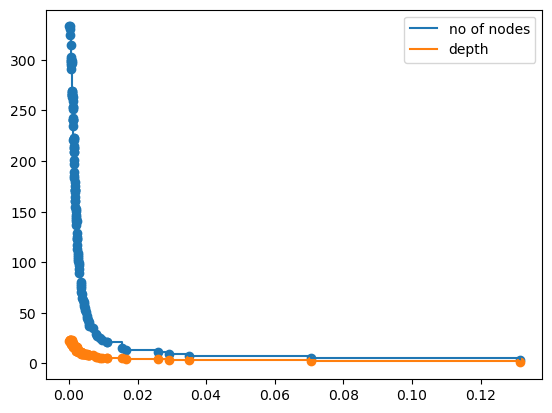

In [59]:
tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    
    
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases

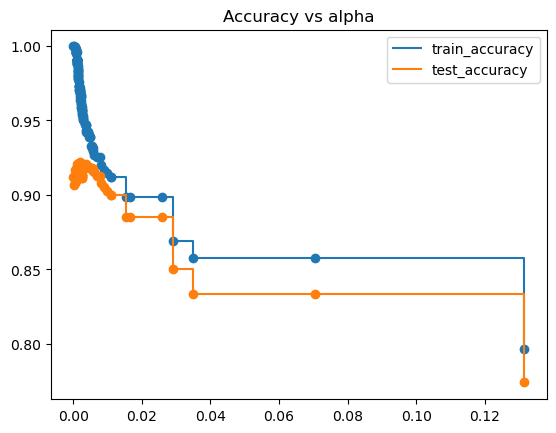

In [60]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.006

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [61]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.006)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

Obtain confusion matrix in order to define different accuracy measures


Train Confusion matrix


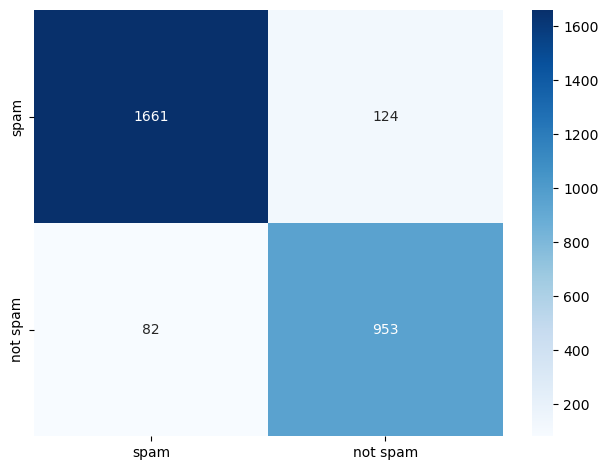

Train true positive: 0.9529546758462422
Train true negative: 0.8848653667595172

Train accuracy: 0.926950354609929
Train balanced accuracy: 0.9189100213028797



Test Confusion matrix


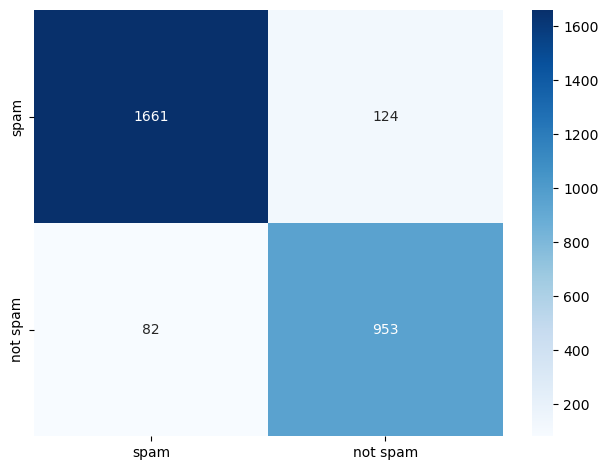

Test true positive: 0.9529546758462422
Test true negative: 0.8848653667595172

Test accuracy: 0.926950354609929
Test balanced accuracy: 0.9189100213028797


In [62]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

print('\n')

plot_confusionmatrix(y_train_pred,y_train,dom = 'Test')
accuracy_metrics(y_train_pred, y_train, dom = 'Test')

Obtained pruned decision tree (with not bad accuracy and with not very big amount of leaves and nodes in depth)

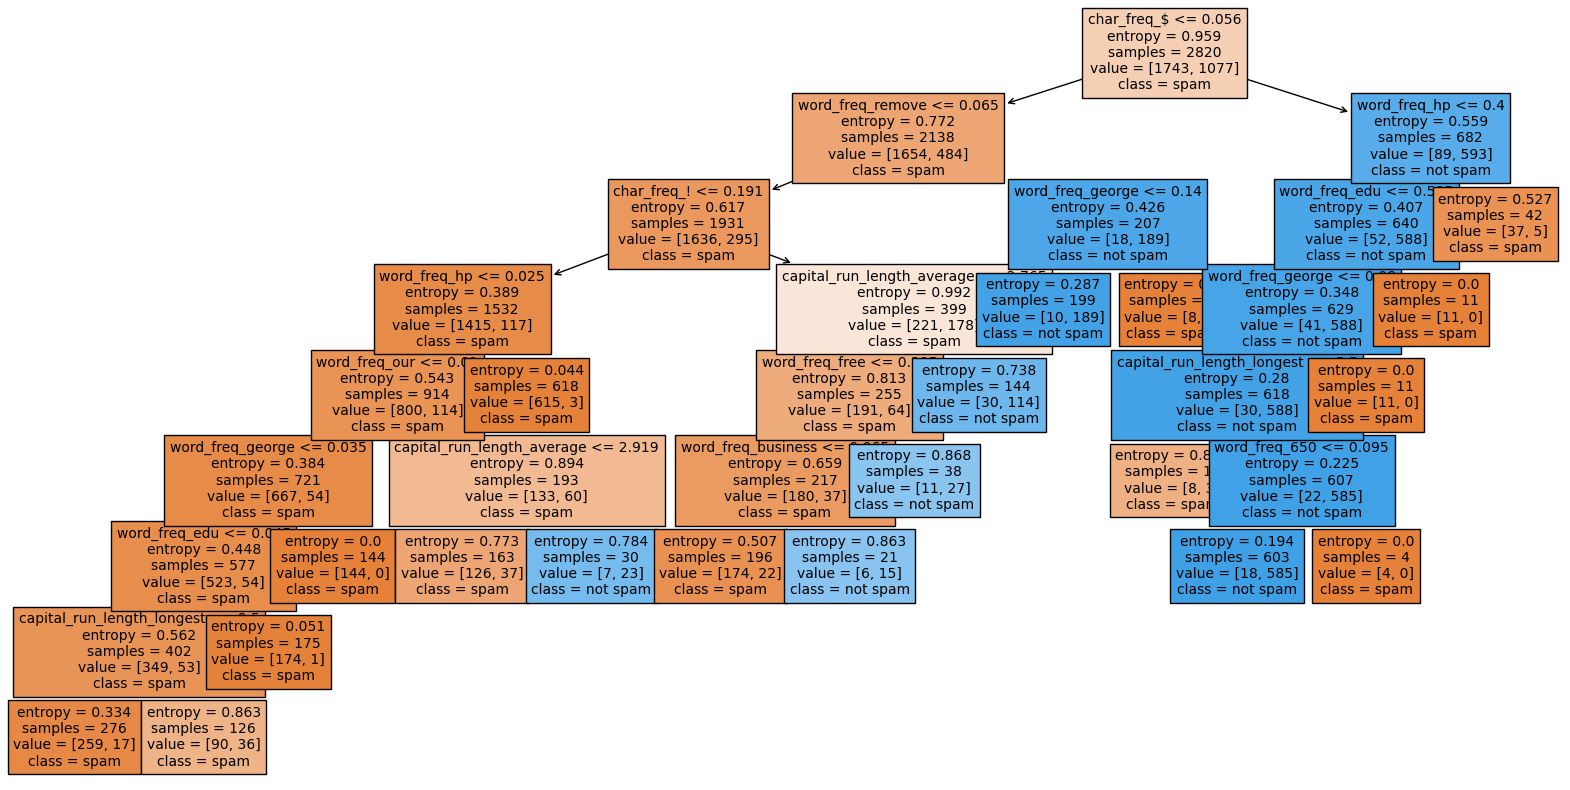

Depth is 9
Number of leafes  19


In [63]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

print('Depth is',tree_model_pruned.tree_.max_depth + 1)
print('Number of leafes ', tree_model_pruned.tree_.n_leaves)

### After PCA

(4210, 4)
(2820, 4)

training accuracy: 0.999290780141844
testing accuracy: 0.8179856115107914

Depth is 22
Number of leafes: 349



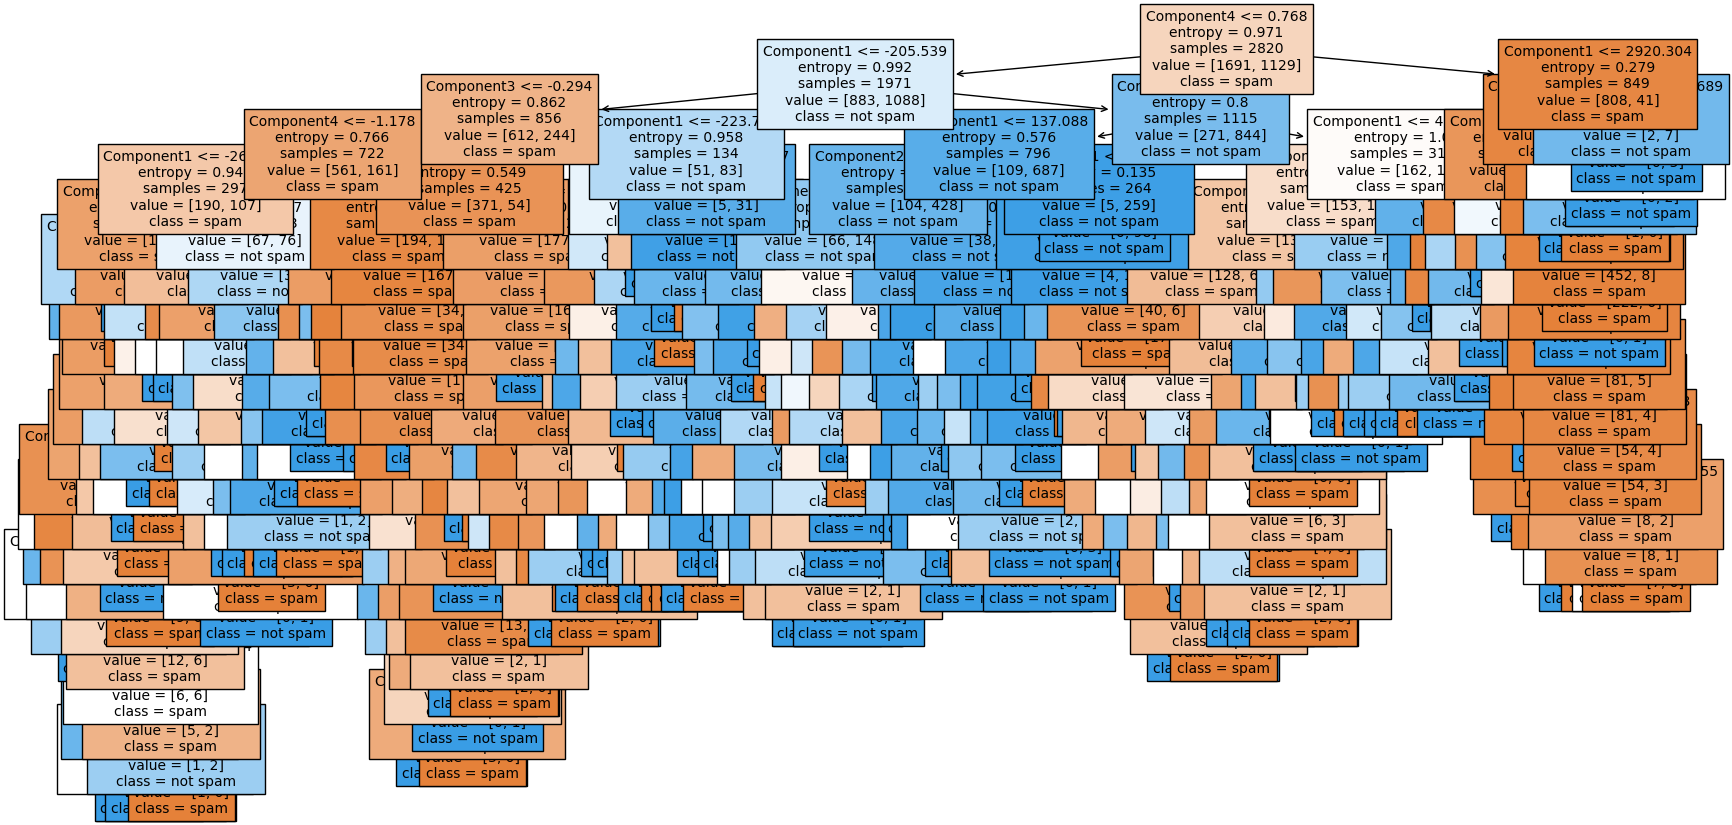

In [64]:
data = df_pca.drop(columns=['Result'])
target = df_pca['Result']
feat_names = df_pca.columns
targ_names = ['spam', 'not spam']
print(data.shape)

X_train, X_test, y_train, y_test = X_train_pca, X_test_pca, y_train_pca, y_test_pca 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'\ntraining accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

print('\nDepth is',tree_model.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Train a classification tree with postpruning with grid-search cross-validation on the cost complexity parameter

In [65]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00026769 0.00044153 0.00048846 0.00048846 0.00057537
 0.00064001 0.00064001 0.00064001 0.00067381 0.00070922 0.00070922
 0.00070922 0.00070922 0.00073268 0.00074463 0.00075947 0.00077101
 0.00078129 0.00079156 0.00081298 0.00085717 0.00085717 0.00086077
 0.00086077 0.00088306 0.00089692 0.0009215  0.00093979 0.00094563
 0.00094563 0.00095389 0.00097285 0.00097691 0.00097691 0.00097691
 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691
 0.00097691 0.00097691 0.00097691 0.00098356 0.0009992  0.00101941
 0.00104172 0.00104451 0.00104451 0.00105006 0.0010517  0.0010522
 0.00105953 0.00110354 0.00111268 0.0011215  0.0011477  0.00115075
 0.00115075 0.00115075 0.00115075 0.00115075 0.00115075 0.00115292
 0.00116559 0.00116559 0.00117035 0.00120919 0.00120919 0.00121177
 0.00121948 0.00122085 0.00123235 0.00123767 0.00124566 0.0012498
 0.00126072 0.0012679  0.00128001 0.00128001 0.00130833 0.00130943
 0.00131543 0.00131759 0.00132459 0.00132459 0.00133043 0.001353

Plot the dependency between amount of nodes in tree, depth of tree and cpp_alpha, test accuracy of decision tree and cpp_alpha in order to choose proper parameter of pruning cpp_alpha

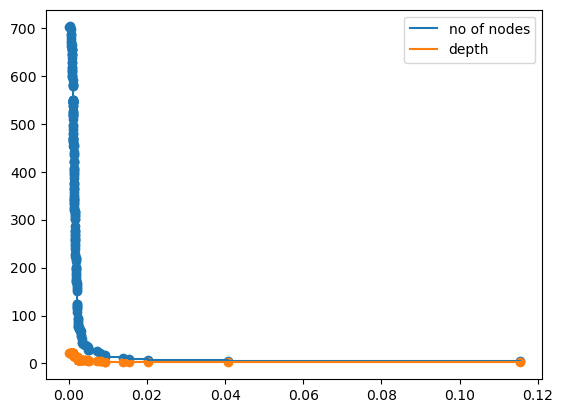

In [66]:
tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    
    
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases. But from some point (alpha = 0.04) the depth and number of nodes remain to be the same.

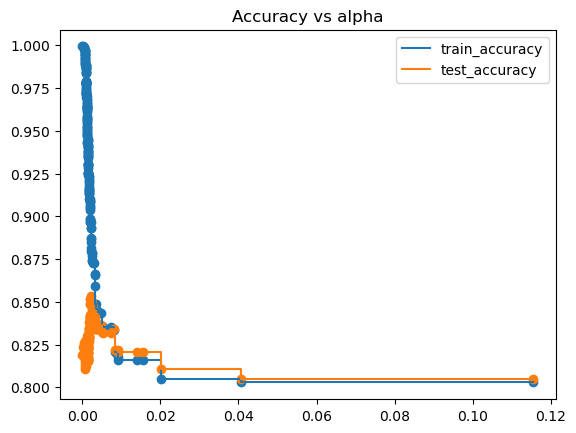

In [67]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.0025 (in order to get higher accuracy)

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [68]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.0025)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

Obtain confusion matrix in order to define different accuracy measures


Train Confusion matrix


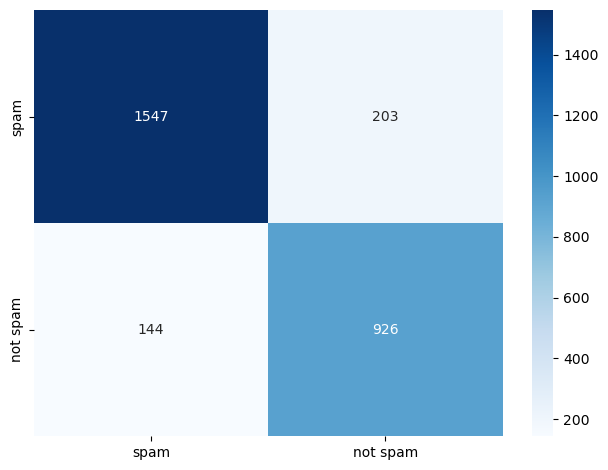

Train true positive: 0.914843287995269
Train true negative: 0.8201948627103631

Train accuracy: 0.8769503546099291
Train balanced accuracy: 0.8675190753528161



Test Confusion matrix


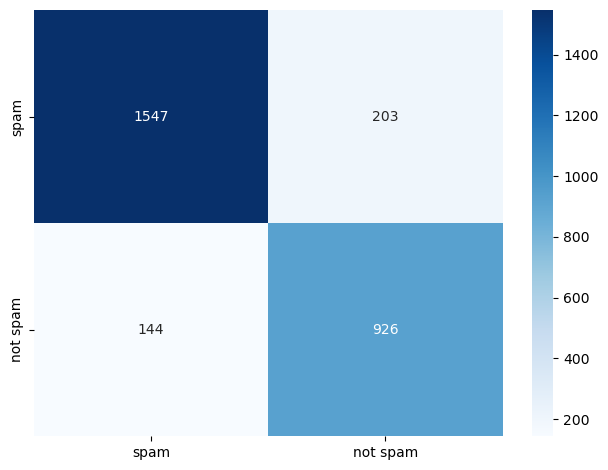

Test true positive: 0.914843287995269
Test true negative: 0.8201948627103631

Test accuracy: 0.8769503546099291
Test balanced accuracy: 0.8675190753528161


In [69]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

print('\n')

plot_confusionmatrix(y_train_pred,y_train,dom = 'Test')
accuracy_metrics(y_train_pred, y_train, dom = 'Test')

Obtained pruned decision tree (with not bad accuracy and with not very big amount of leaves and nodes in depth)

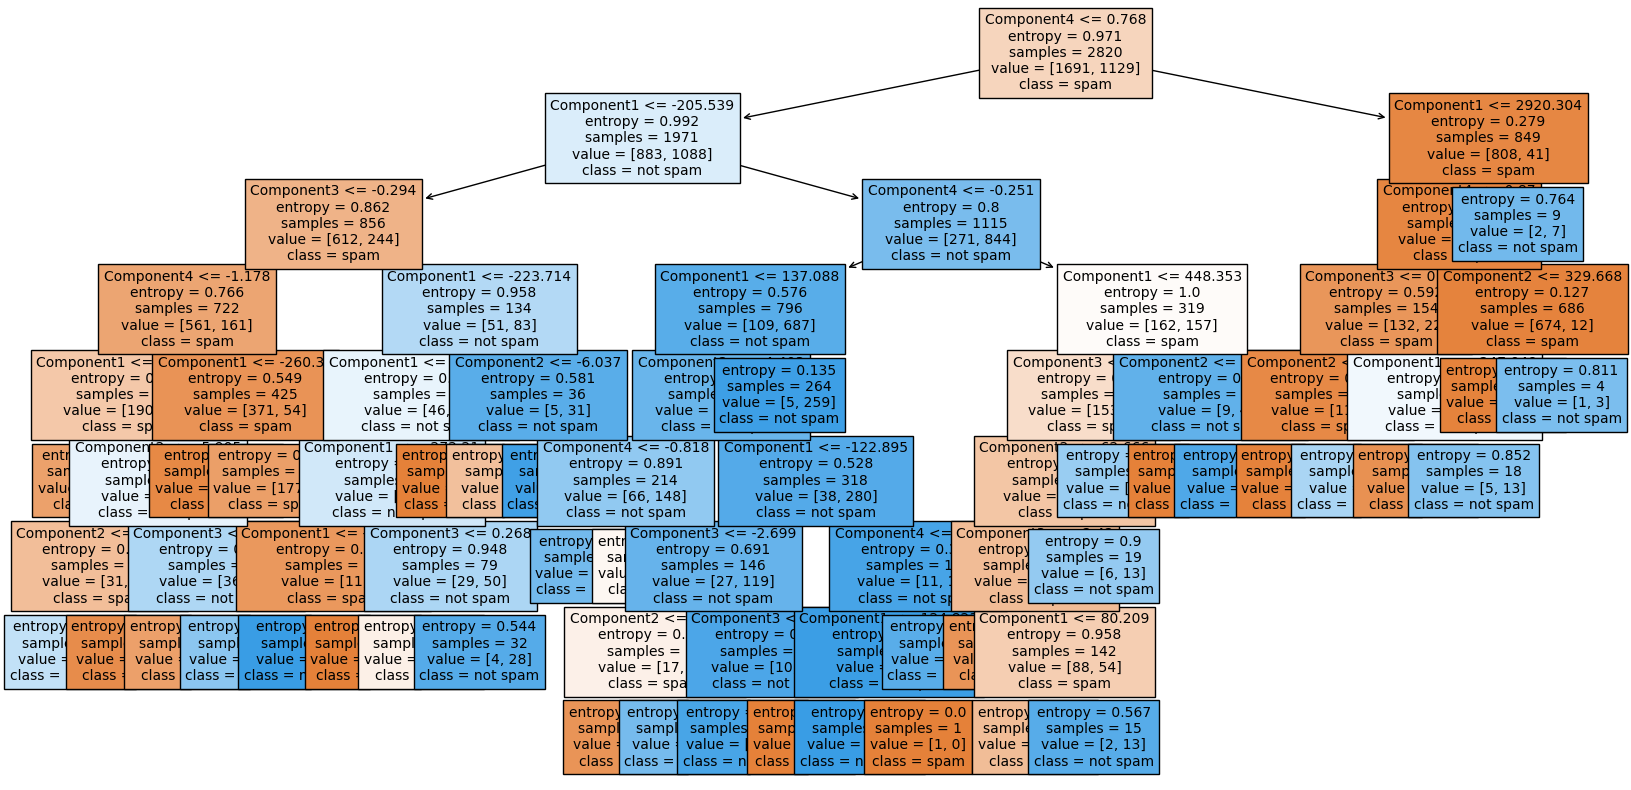

Depth is 9
Number of leafes  38


In [70]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

print('Depth is',tree_model_pruned.tree_.max_depth + 1)
print('Number of leafes ', tree_model_pruned.tree_.n_leaves)

### Using feachers chosen with SelectFromModel

(4210, 11)
(2820, 11)

training accuracy: 0.9975177304964539
testing accuracy: 0.9151079136690647

Depth is 23
Number of leafes: 217



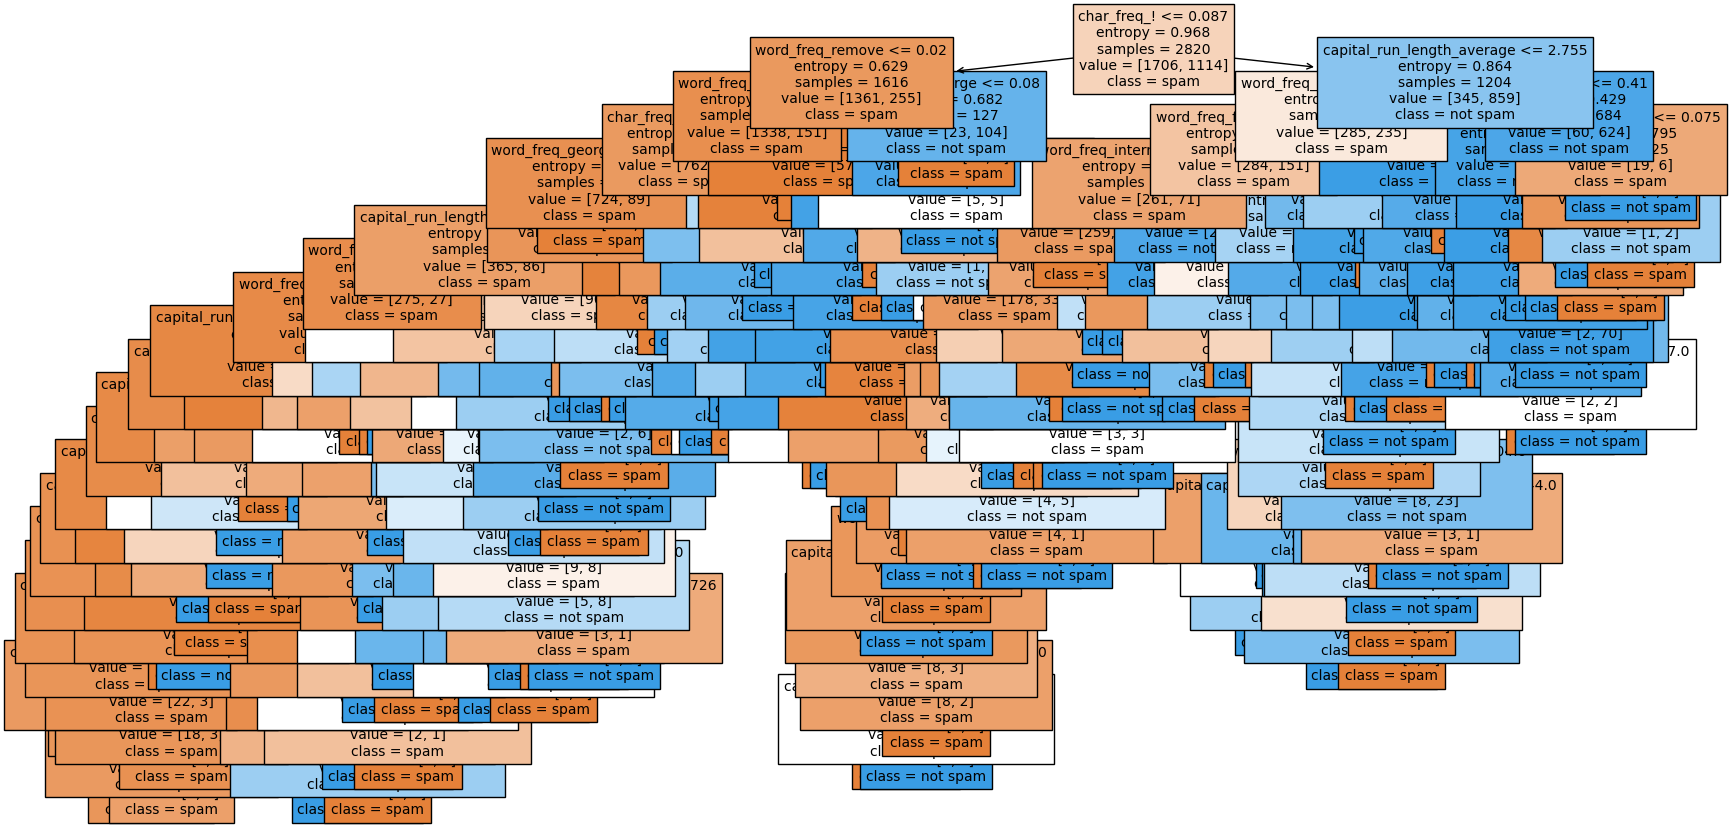

In [71]:
data = X_SFM
target = y_SFM
feat_names = X_SFM.columns
targ_names = ['spam', 'not spam']
print(data.shape)

X_train, X_test, y_train, y_test = X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'\ntraining accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

print('\nDepth is',tree_model.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Apply the cost complexity pruning in order to avoid overfitting and make model more generalized

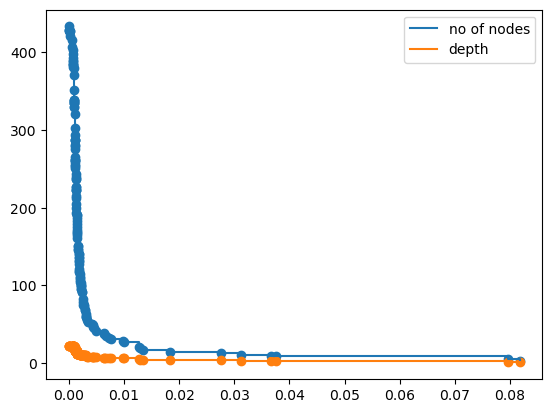

In [72]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    
    
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases. But from some point (alpha = 0.04) the depth and number of nodes remain to be the same.

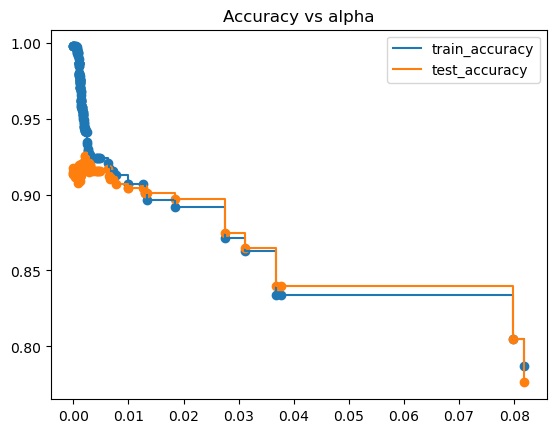

In [73]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.008 (in order to get higher accuracy)

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [74]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.008)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

Obtain confusion matrix in order to define different accuracy measures


Train Confusion matrix


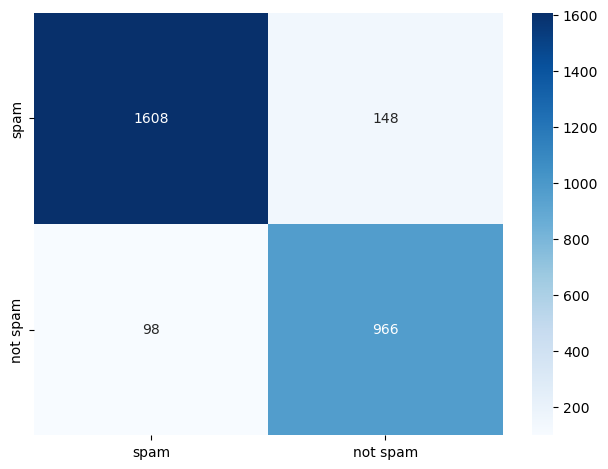

Train true positive: 0.9425556858147714
Train true negative: 0.8671454219030521

Train accuracy: 0.9127659574468086
Train balanced accuracy: 0.9048505538589118



Test Confusion matrix


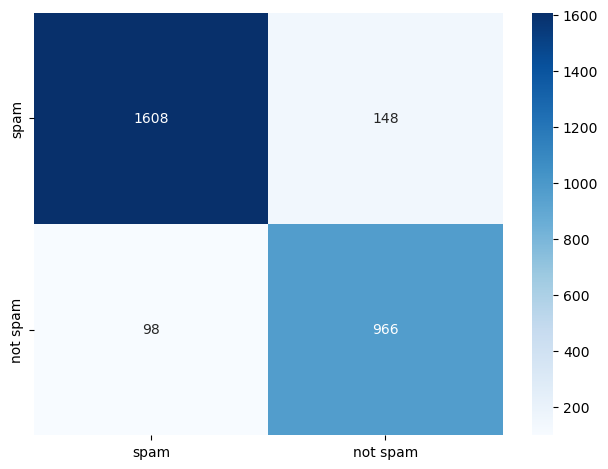

Test true positive: 0.9425556858147714
Test true negative: 0.8671454219030521

Test accuracy: 0.9127659574468086
Test balanced accuracy: 0.9048505538589118


In [75]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

print('\n')

plot_confusionmatrix(y_train_pred,y_train,dom = 'Test')
accuracy_metrics(y_train_pred, y_train, dom = 'Test')

Obtained pruned decision tree (with not bad accuracy and with not very big amount of leaves and nodes in depth)

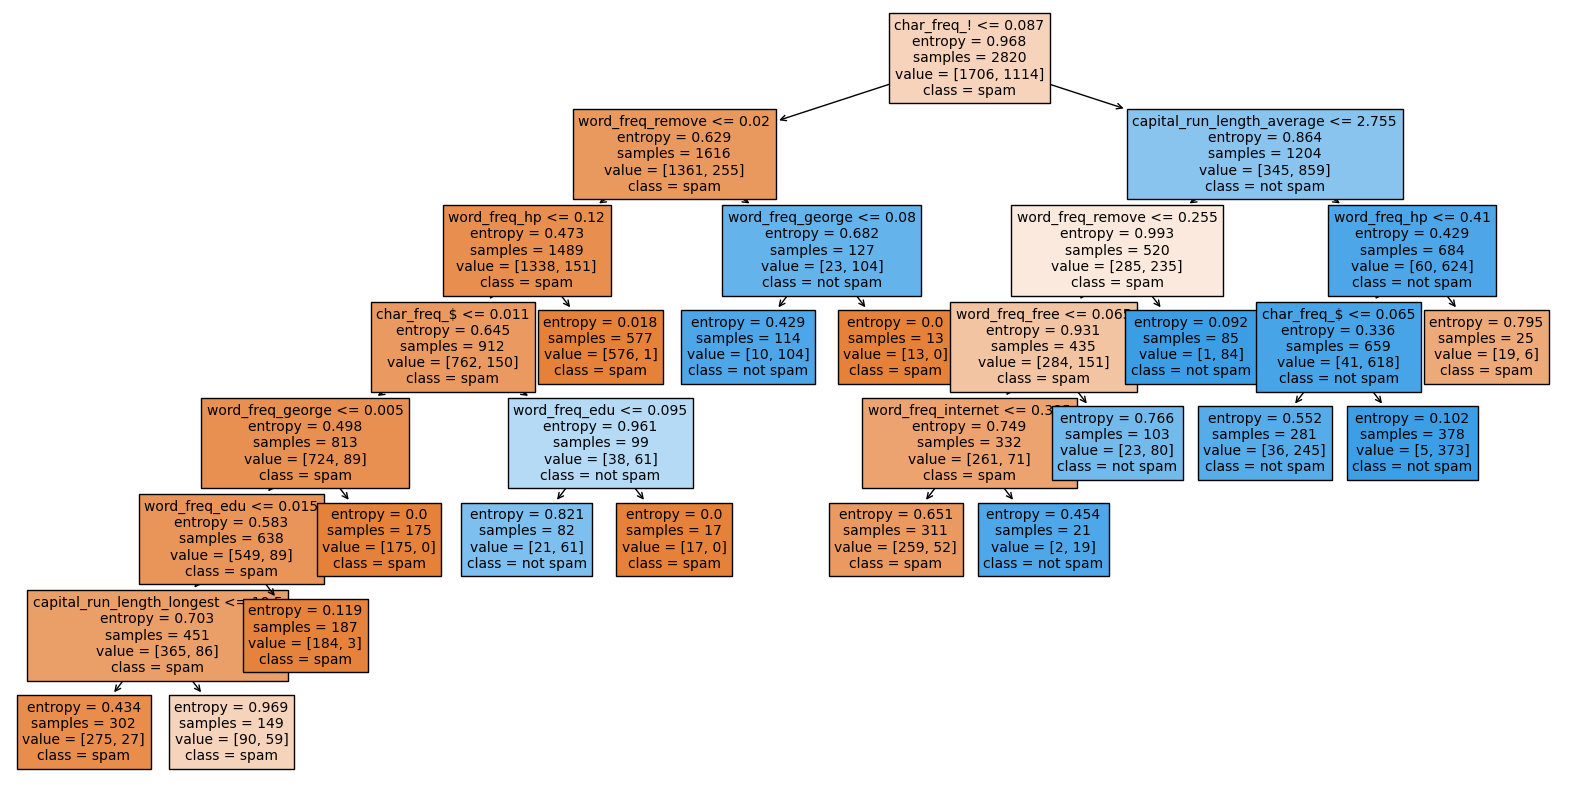

Depth is 8
Number of leafes  16


In [76]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

print('Depth is',tree_model_pruned.tree_.max_depth + 1)
print('Number of leafes ', tree_model_pruned.tree_.n_leaves)

# Support vector machine (classification)

## Hyperparameter Optimization using GridSearch CV

### All dataset

In [77]:
X_train, X_test, y_train, y_test = normalize_train_test(df_no_result, df_new['spam'], testsize = 0.33, normalize = True)

Instantiate classifier with default hyperparameters with kernel = rbf, C = 1.0 and gamma = auto

In [78]:
svc = SVC()

Declare parameters for hyperparameter tuning

In [160]:
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

In [161]:
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

Print best parameter after tuning

In [166]:
print(grid_search.best_params_)

{'C': 100, 'kernel': 'linear'}


Print how our model looks after hyper-parameter tuning

In [167]:
print(f'Model: {grid_search.best_estimator_}')

Model: SVC(C=100, kernel='linear')


Make prediction on test set for obtained model and find confusion matrix in order to define different accuracy measures


Train Confusion matrix


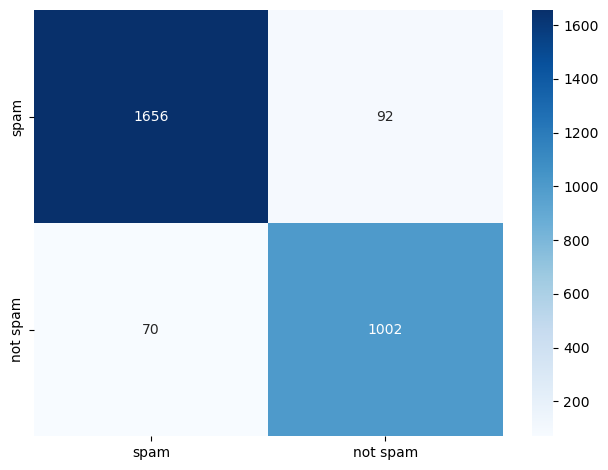

Train true positive: 0.9594438006952491
Train true negative: 0.9159049360146252

Train accuracy: 0.9425531914893617
Train balanced accuracy: 0.9376743683549371



Test Confusion matrix


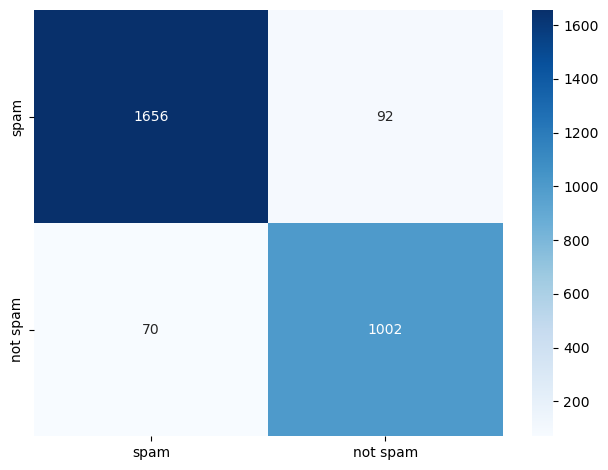

Test true positive: 0.9594438006952491
Test true negative: 0.9159049360146252

Test accuracy: 0.9425531914893617
Test balanced accuracy: 0.9376743683549371


In [168]:
svc_model = SVC(kernel = 'linear', C = 100.0)
svc_model.fit(X_train, y_train)

y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

print('\n')

plot_confusionmatrix(y_train_pred,y_train,dom = 'Test')
accuracy_metrics(y_train_pred, y_train, dom = 'Test')

### Without strongly correlated features

In [174]:
X_train, X_test, y_train, y_test = normalize_train_test(X_no_strong_corr, y_no_strong_corr, testsize = 0.33, normalize = True)

Instantiate classifier with default hyperparameters with kernel = rbf, C = 1.0 and gamma = auto

In [175]:
svc = SVC()

Declare parameters for hyperparameter tuning

In [176]:
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

In [177]:
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

Print best parameter after tuning

In [178]:
print(grid_search.best_params_)

{'C': 1000, 'kernel': 'linear'}


Print how our model looks after hyper-parameter tuning

In [179]:
print(f'Model: {grid_search.best_estimator_}')

Model: SVC(C=1000, kernel='linear')


Make prediction on test set for obtained model and find confusion matrix in order to define different accuracy measures


Train Confusion matrix


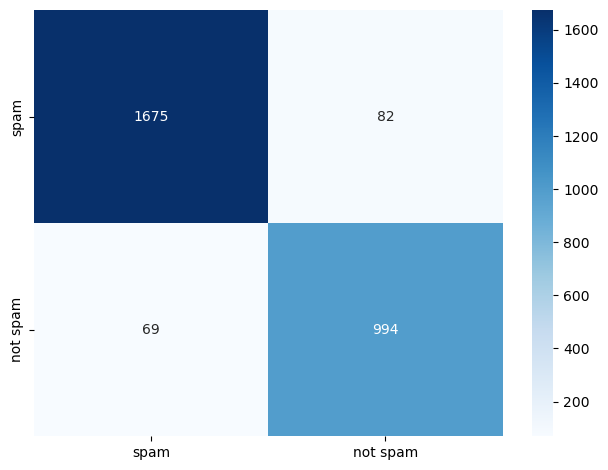

Train true positive: 0.9604357798165137
Train true negative: 0.9237918215613383

Train accuracy: 0.9464539007092199
Train balanced accuracy: 0.942113800688926



Test Confusion matrix


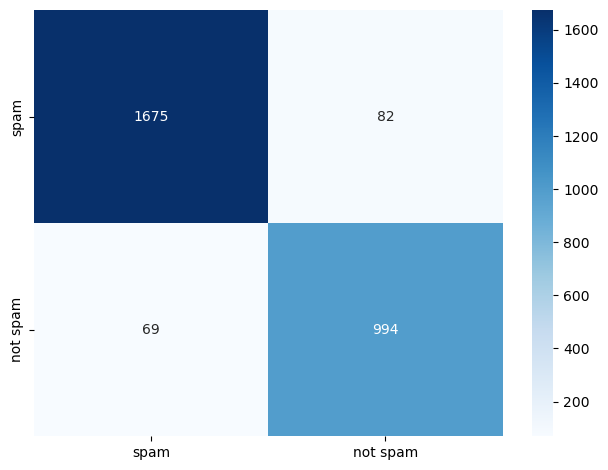

Test true positive: 0.9604357798165137
Test true negative: 0.9237918215613383

Test accuracy: 0.9464539007092199
Test balanced accuracy: 0.942113800688926


In [181]:
svc_model = SVC(kernel = 'linear', C = 1000.0)
svc_model.fit(X_train, y_train)

y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

print('\n')

plot_confusionmatrix(y_train_pred,y_train,dom = 'Test')
accuracy_metrics(y_train_pred, y_train, dom = 'Test')

### After PCA

In [182]:
X_train, X_test, y_train, y_test = normalize_train_test(X_pca, y_pca, testsize = 0.33, normalize = True)

As we have already set the grid_search parameters

In [183]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

Print best parameter after tuning

In [185]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.8, 'kernel': 'rbf'}


Print how our model looks after hyper-parameter tuning

In [186]:
print(f'Model: {grid_search.best_estimator_}')

Model: SVC(C=100, gamma=0.8)


Make prediction on test set for obtained model and find confusion matrix in order to define different accuracy measures


Train Confusion matrix


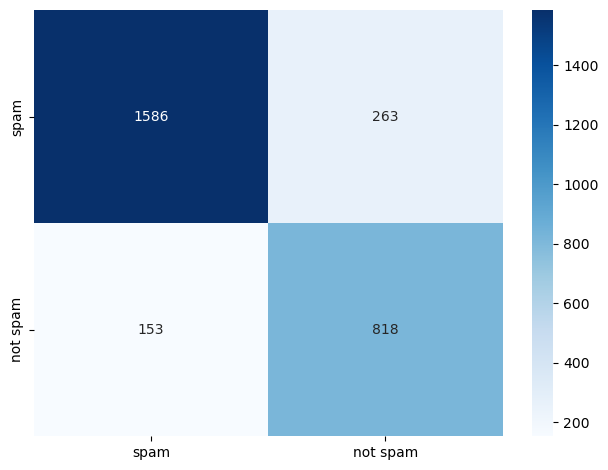

Train true positive: 0.9120184013801035
Train true negative: 0.7567067530064755

Train accuracy: 0.8524822695035461
Train balanced accuracy: 0.8343625771932894



Test Confusion matrix


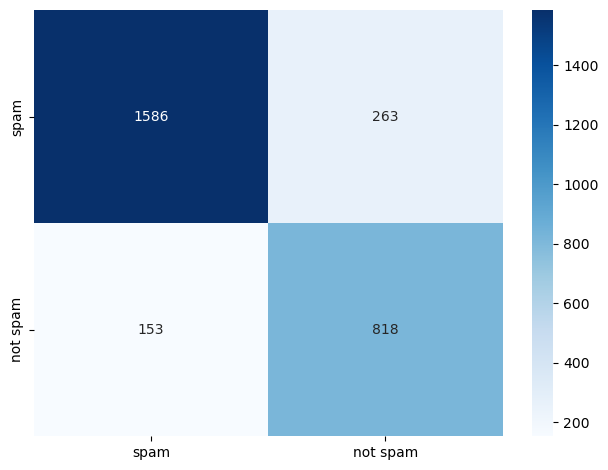

Test true positive: 0.9120184013801035
Test true negative: 0.7567067530064755

Test accuracy: 0.8524822695035461
Test balanced accuracy: 0.8343625771932894


In [187]:
svc_model = SVC(kernel = 'rbf', C = 100.0, gamma = 0.8)
svc_model.fit(X_train, y_train)

y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

print('\n')

plot_confusionmatrix(y_train_pred,y_train,dom = 'Test')
accuracy_metrics(y_train_pred, y_train, dom = 'Test')

### Using feachers chosen with SelectFromModel

In [188]:
X_train, X_test, y_train, y_test = normalize_train_test(X_SFM, y_SFM, testsize = 0.33, normalize = True)

As we have already set the grid_search parameters

In [189]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

Print how our model looks after hyper-parameter tuning

In [190]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Print how our model looks after hyper-parameter tuning

In [191]:
print(f'Model: {grid_search.best_estimator_}')

Model: SVC(C=10, gamma=0.1)



Train Confusion matrix


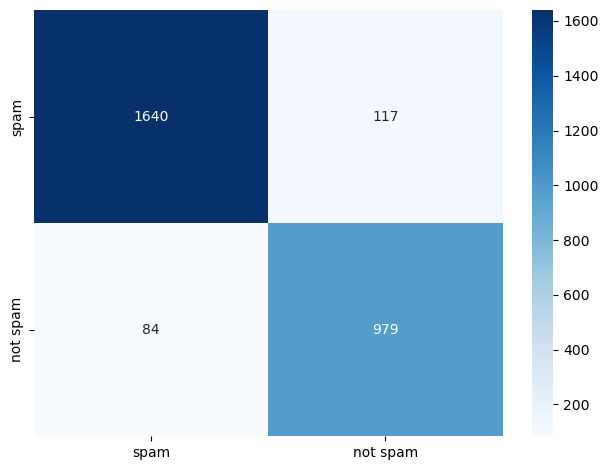

Train true positive: 0.951276102088167
Train true negative: 0.8932481751824818

Train accuracy: 0.9287234042553192
Train balanced accuracy: 0.9222621386353245



Test Confusion matrix


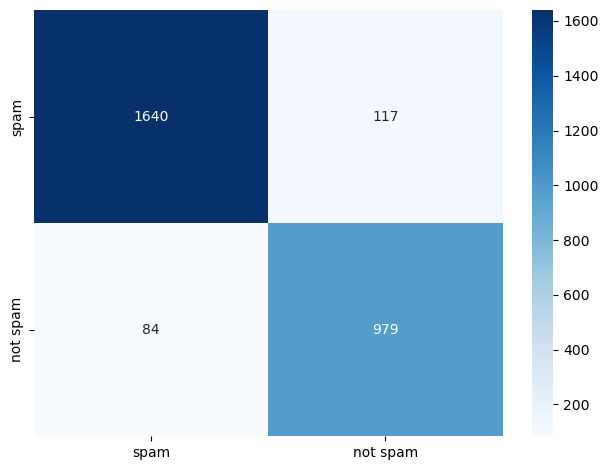

Test true positive: 0.951276102088167
Test true negative: 0.8932481751824818

Test accuracy: 0.9287234042553192
Test balanced accuracy: 0.9222621386353245


In [192]:
svc_model = SVC(kernel = 'rbf', C = 10.0, gamma = 0.1)
svc_model.fit(X_train, y_train)

y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
accuracy_metrics(y_train_pred, y_train, dom = 'Train')

print('\n')

plot_confusionmatrix(y_train_pred,y_train,dom = 'Test')
accuracy_metrics(y_train_pred, y_train, dom = 'Test')

# Logistic regression

### Hyperparameter Optimization using GridSearch CV

### All data

In [79]:
X_train, X_test, y_train, y_test = normalize_train_test(df_no_result, df_new['spam'], testsize = 0.33, normalize = True)

In [80]:
#C = np.logspace(-4, 4, 50)
#penalty = ['l1', 'l2']
#maxiter = [10000, 100000, 1000000]

In [81]:
#parameters = dict( logistic_Reg__C=C,
#                   logistic_Reg__penalty=penalty, max_iter=maxiter)

In [204]:
parameters = [ {'C': np.logspace(-4, 4, 50), 'max_iter':[10000, 100000, 1000000] } ]

In [205]:
logreg = LogisticRegression() 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'max_iter': [10000, 100000, 1000000]}],
             scoring='accuracy')

In [207]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9316


Parameters that give the best results : 

 {'C': 109.85411419875572, 'max_iter': 10000}


Estimator that was chosen by the search : 

 LogisticRegression(C=109.85411419875572, max_iter=10000)


In [53]:
parameters = [ {'C': [1, 10, 100, 1000, 10000], 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

In [54]:
# import warnings filter

from warnings import simplefilter

# ignore all future warnings

simplefilter(action='ignore', category=FutureWarning)



logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [1, 10, 100, 1000, 10000],
                          'max_iter': [10000, 100000, 1000000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

In [55]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9365


Parameters that give the best results : 

 {'C': 1000, 'max_iter': 10000, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, max_iter=10000, solver='liblinear')


In [58]:
logreg_best = LogisticRegression(C = 100, max_iter = 10000,  penalty = 'l2')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.9404255319148936

Test true positive: 0.944954128440367
Test true negative: 0.9054054054054054

Test accuracy: 0.9302158273381295
Test balanced accuracy: 0.9251797669228862


In [60]:
parameters = [ {'C': np.logspace(-4, 4, 50), 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

In [61]:
logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'max_iter': [10000, 100000, 1000000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

In [62]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9369


Parameters that give the best results : 

 {'C': 719.6856730011514, 'max_iter': 10000, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=719.6856730011514, max_iter=10000, solver='liblinear')


In [63]:
logreg_best = LogisticRegression(C = 719.6856730011514, max_iter = 10000,  penalty = 'l2')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.9400709219858157

Test true positive: 0.9461009174311926
Test true negative: 0.9015444015444015

Test accuracy: 0.9294964028776979
Test balanced accuracy: 0.9238226594877971


In [64]:
model = logreg_best

scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 20, n_jobs = -1)

In [66]:
scores.mean()

0.9354609929078016

In [67]:
model = LogisticRegression(C = 100, max_iter = 10000,  penalty = 'l2')
scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 20, n_jobs = -1)
scores.mean()

0.9351063829787236

In [68]:
model = logreg_best

scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [69]:
scores.mean()

0.9368794326241134

In [70]:
model = LogisticRegression(C = 100, max_iter = 10000,  penalty = 'l2')
scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
scores.mean()

0.9354609929078015

### Without strongly correlated features

In [82]:
X_train, X_test, y_train, y_test = normalize_train_test(X_no_strong_corr, y_no_strong_corr, testsize = 0.33, normalize = True)

In [83]:
parameters = [ {'C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

In [84]:
logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [1.0, 10.0, 100.0, 1000.0, 10000.0],
                          'max_iter': [10000, 100000, 1000000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

In [85]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9323


Parameters that give the best results : 

 {'C': 10.0, 'max_iter': 10000, 'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=10.0, max_iter=10000, penalty='l1', solver='liblinear')


In [86]:
logreg_best = LogisticRegression(C = 100.0, max_iter = 1000000,  penalty = 'l1', solver = 'liblinear')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.9372340425531915

Test true positive: 0.9454976303317536
Test true negative: 0.8992673992673993

Test accuracy: 0.9273381294964029
Test balanced accuracy: 0.9223825147995764


In [90]:
scores = cross_val_score(logreg_best, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [91]:
scores.mean()

0.9312056737588653

### After PCA

In [92]:
X_train, X_test, y_train, y_test = normalize_train_test(X_pca, y_pca, testsize = 0.33, normalize = True)

In [93]:
parameters = [ {'C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

In [94]:
logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [1.0, 10.0, 100.0, 1000.0, 10000.0],
                          'max_iter': [10000, 100000, 1000000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

In [95]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7901


Parameters that give the best results : 

 {'C': 1.0, 'max_iter': 10000, 'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')


In [98]:
logreg_best = LogisticRegression(C = 1.0, max_iter = 10000,  penalty = 'l1', solver = 'liblinear')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.7907801418439716

Test true positive: 0.8778443113772455
Test true negative: 0.6774774774774774

Test accuracy: 0.797841726618705
Test balanced accuracy: 0.7776608944273615


In [99]:
scores = cross_val_score(logreg_best, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
scores.mean()

0.7900709219858155

In [102]:
parameters = [ {'C': np.logspace(-4, 4, 50), 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

In [103]:
logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'max_iter': [10000, 100000, 1000000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

In [104]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7904


Parameters that give the best results : 

 {'C': 1.2067926406393288, 'max_iter': 10000, 'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.2067926406393288, max_iter=10000, penalty='l1',
                   solver='liblinear')


In [105]:
logreg_best = LogisticRegression(C = 1.2067926406393288, max_iter = 10000,  penalty = 'l1', solver = 'liblinear')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.7907801418439716

Test true positive: 0.8790419161676647
Test true negative: 0.6756756756756757

Test accuracy: 0.797841726618705
Test balanced accuracy: 0.7773587959216701


In [106]:
scores = cross_val_score(logreg_best, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
scores.mean()

0.7904255319148936

### Using feachers chosen with SelectFromModel

In [107]:
X_train, X_test, y_train, y_test = normalize_train_test(X_SFM, y_SFM, testsize = 0.33, normalize = True)

In [108]:
parameters = [ {'C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

In [109]:
logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': [1.0, 10.0, 100.0, 1000.0, 10000.0],
                          'max_iter': [10000, 100000, 1000000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

In [110]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9177


Parameters that give the best results : 

 {'C': 10000.0, 'max_iter': 10000, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=10000.0, max_iter=10000, solver='liblinear')


In [113]:
logreg_best = LogisticRegression(C = 10000.0, max_iter = 10000,  penalty = 'l2')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.9184397163120568

Test true positive: 0.953405017921147
Test true negative: 0.8698010849909584

Test accuracy: 0.9201438848920863
Test balanced accuracy: 0.9116030514560527


In [114]:
scores = cross_val_score(logreg_best, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
scores.mean()

0.9170212765957448

In [115]:
parameters = [ {'C': np.logspace(-4, 4, 50), 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

In [116]:
logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'max_iter': [10000, 100000, 1000000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy', verbose=1)

In [117]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9177


Parameters that give the best results : 

 {'C': 6866.488450042998, 'max_iter': 100000, 'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=6866.488450042998, max_iter=100000, penalty='l1',
                   solver='liblinear')


In [119]:
logreg_best = LogisticRegression(C = 6866.488450042998, max_iter = 100000,  penalty = 'l1', solver = 'liblinear')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.9177304964539007

Test true positive: 0.953405017921147
Test true negative: 0.8679927667269439

Test accuracy: 0.9194244604316547
Test balanced accuracy: 0.9106988923240454


In [120]:
scores = cross_val_score(logreg_best, X_train, y_train, scoring = 'accuracy', cv = 5, n_jobs = -1)
scores.mean()

0.9173758865248228

In [121]:
parameters = [ {'C': [1.0, 10.0, 100.0, 1000.0, 10000.0], 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 20, verbose=1)
grid_search.fit(X_train, y_train)

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

Fitting 20 folds for each of 30 candidates, totalling 600 fits
GridSearch CV best score : 0.9174


Parameters that give the best results : 

 {'C': 1000.0, 'max_iter': 10000, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000.0, max_iter=10000, solver='liblinear')


In [122]:
logreg_best = LogisticRegression(C = 1000.0, max_iter = 10000,  penalty = 'l2', solver = 'liblinear')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.9191489361702128

Test true positive: 0.954599761051374
Test true negative: 0.8625678119349005

Test accuracy: 0.9179856115107914
Test balanced accuracy: 0.9085837864931372


In [123]:
scores = cross_val_score(logreg_best, X_train, y_train, scoring = 'accuracy', cv = 20, n_jobs = -1)
scores.mean()

0.9173758865248228

In [124]:
parameters = [ {'C': np.logspace(-4, 4, 50), 'penalty' : ['l1', 'l2'], 'max_iter':[10000, 100000, 1000000]} ]

logreg = LogisticRegression(solver = 'liblinear') 

grid_search = GridSearchCV(logreg, parameters, scoring = 'accuracy', cv = 20, verbose=1)
grid_search.fit(X_train, y_train)

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))



Fitting 20 folds for each of 300 candidates, totalling 6000 fits
GridSearch CV best score : 0.9174


Parameters that give the best results : 

 {'C': 494.1713361323828, 'max_iter': 10000, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=494.1713361323828, max_iter=10000, solver='liblinear')


In [125]:
logreg_best = LogisticRegression(C = 494.1713361323828, max_iter = 10000,  penalty = 'l2', solver = 'liblinear')

logreg_best.fit(X_train, y_train)

y_pred_train = logreg_best.predict(X_train)
y_pred_test = logreg_best.predict(X_test)

print(f'Training accuracy: {accuracy_score(y_train, y_pred_train)}\n')

accuracy_metrics(y_pred_test, y_test, dom = 'Test')

Training accuracy: 0.9191489361702128

Test true positive: 0.954599761051374
Test true negative: 0.8625678119349005

Test accuracy: 0.9179856115107914
Test balanced accuracy: 0.9085837864931372


In [126]:
scores = cross_val_score(logreg_best, X_train, y_train, scoring = 'accuracy', cv = 20, n_jobs = -1)
scores.mean()

0.9173758865248228

# Select best algorithm automatically

In [129]:
models = []
models.append(('LR', LogisticRegression(max_iter = 10000, solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.923404 (0.020689)
LDA: 0.886170 (0.017549)
KNN: 0.898936 (0.016576)
CART: 0.905674 (0.021229)
NB: 0.816667 (0.016636)
SVM: 0.929787 (0.011523)


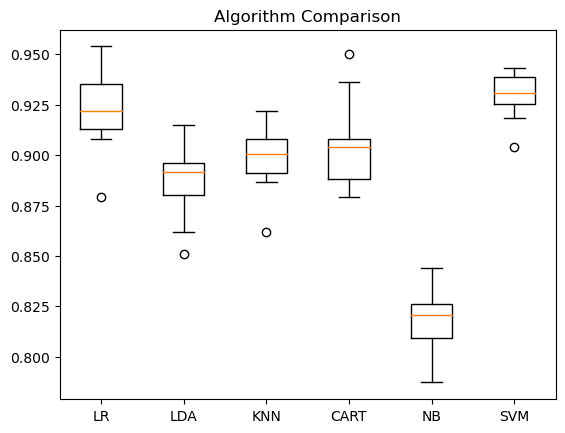

In [130]:
X_train, X_test, y_train, y_test = normalize_train_test(df_no_result, df_new['spam'], testsize = 0.33, normalize = True)
# import warnings filter

from warnings import simplefilter

# ignore all future warnings

simplefilter(action='ignore', category=FutureWarning)


# evaluate each model in turn

results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

The results in the previous section suggest that the ????? SVM was perhaps the most accurate model. We will use this model as our final model for prediction.